## **PREPROCESSING**

In [ ]:
############## SCALERS ############

import pandas as pd
import numpy as np
############## Standard Scaler ############################
from sklearn.preprocessing import StandardScaler
a = np.array([[100, 0.1],
              [ 90, 0.9],
              [ 40, 0.8],
              [101, 1.2],
              [104, 2.3]])

scaler = StandardScaler()
scl_a = scaler.fit_transform(a)
print(scl_a)

############# Min Max Scaler ####################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scl_a = scaler.fit_transform(a)
print(scl_a)

In [ ]:
########### KNN-REG-PIPE ###########

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

insure = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Medical Cost Personal/insurance.csv")
dum_insure = pd.get_dummies(insure, drop_first=True)

X = dum_insure.drop('charges', axis=1)
y = dum_insure['charges']

params = {'n_neighbors' :np.arange(1,21)}

kfold = KFold(n_splits = 5, 
                        shuffle=True, random_state=23)
knn = KNeighborsRegressor()
gcv = GridSearchCV(knn, param_grid=params,
                   cv=kfold, scoring="r2")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

######################## Pipeline ##############################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn = KNeighborsRegressor()
scaler = StandardScaler()
pipe = Pipeline([('SCL', scaler), ('KNN', knn)])

params = {'KNN__n_neighbors' :np.arange(1,21)}

kfold = KFold(n_splits = 5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold, scoring="r2")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

###### Predicting on the unlabelled data
tst_img = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Image Segmentation/tst_img.csv")
best_model = gcv.best_estimator_
encoded_pred = best_model.predict(tst_img)
decoded_pred = lbl.inverse_transform(encoded_pred)
print(decoded_pred)

In [ ]:
###### KNN MULTICLASS ############

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder

image = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Image Segmentation/Image_Segmention.csv")
lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])
print(lbl.classes_)

X = image.drop('Class', axis=1)
y = image['Class']

params = {'n_neighbors' :np.arange(1,31)}

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
knn = KNeighborsClassifier()
gcv = GridSearchCV(knn, param_grid=params,
                   cv=kfold, scoring="neg_log_loss")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

######################## Pipeline ##############################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline([('SCL', scaler), ('KNN', knn)])

params = {'KNN__n_neighbors' :np.arange(1,31)}

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold, scoring="neg_log_loss")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

###### Predicting on the unlabelled data
tst_img = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Image Segmentation/tst_img.csv")
best_model = gcv.best_estimator_
encoded_pred = best_model.predict(tst_img)
decoded_pred = lbl.inverse_transform(encoded_pred)
print(decoded_pred)

In [ ]:
############# IMPUTERS ########
import pandas as pd
import os
import numpy as np
os.chdir("C:/Training/Academy/Statistics (Python)/Datasets")
from sklearn.impute import SimpleImputer

job = pd.read_csv("JobSalary2.csv")

job.isnull().sum()

# Constant 
imputer = SimpleImputer(strategy='constant',
                        fill_value=50)
imp_data = imputer.fit_transform(job)

pd_imp_data = pd.DataFrame(imp_data,
                           columns=job.columns)

# Mean
imputer = SimpleImputer(strategy='mean')
imp_data = imputer.fit_transform(job)

pd_imp_data = pd.DataFrame(imp_data,
                           columns=job.columns)

# Median
imputer = SimpleImputer(strategy='median')
imp_data = imputer.fit_transform(job)

pd_imp_data = pd.DataFrame(imp_data,
                           columns=job.columns)

################# K-NN ###########################
from sklearn.impute import KNNImputer
X = np.array( [[1,     2,    np.nan],
               [8,     6.3,  5.6], 
               [1.2,   2.1,  4],
               [1.25,  2.35, 5],
               [1.2,   2.3,  3],
               [np.nan,6,    5],
               [10,    6.43, 5.61]
               ])
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

In [ ]:
########### CHEM-IMPUTE ##########
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import LinearRegression 

chem = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Chemical Process Data/ChemicalProcess.csv")
chem.isnull().sum()

X = chem.drop('Yield', axis=1)
y = chem['Yield']

imputer = SimpleImputer()
scaler = StandardScaler()
knn = KNeighborsRegressor()
kfold = KFold(n_splits=5, shuffle=True, 
              random_state=23)
pipe = Pipeline([('IMP',imputer),
                 ('SCL',scaler),('KNN',knn)])
params = {'KNN__n_neighbors': np.arange(1,31),
          'IMP__strategy':['mean','median']}
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold, scoring='r2')
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

########## Linear Regression ############
lr = LinearRegression()
imputer = SimpleImputer()
scaler = StandardScaler()
kfold = KFold(n_splits=5, shuffle=True, 
              random_state=23)
pipe = Pipeline([('IMP',imputer),('LIN',lr)])
params = {'IMP__strategy':['mean','median']}
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold, scoring='r2')
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

## **classification error**

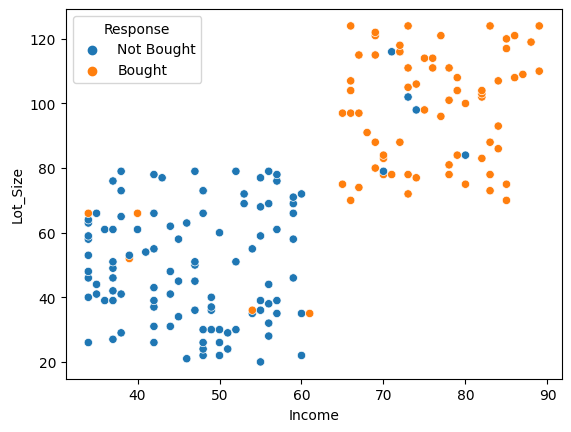

Not Bought    59.444444
Bought        40.555556
Name: Response, dtype: float64
Not Bought    59.52381
Bought        40.47619
Name: Response, dtype: float64
Not Bought    59.259259
Bought        40.740741
Name: Response, dtype: float64


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

mowers = pd.read_csv("/content/RidingMowers.csv")

sns.scatterplot(data=mowers, x='Income', y='Lot_Size', hue='Response')
plt.show()

train, test = train_test_split(mowers, test_size=0.3,
                               random_state=23,
                               stratify=mowers['Response'])

X_train = train.drop('Response', axis=1)
y_train = train['Response']
X_test = test.drop('Response', axis=1)
y_test = test['Response']

print(mowers['Response'].value_counts(normalize=True)*100)
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

In [ ]:
#### Building the model on Train Set
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
print(confusion_matrix( y_test, y_pred   ))
print(accuracy_score( y_test, y_pred))

print(classification_report( y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

[[-0.19290666 -0.01963837]]
[13.78961765]
[[20  2]
 [ 2 30]]
0.9259259259259259
              precision    recall  f1-score   support

      Bought       0.91      0.91      0.91        22
  Not Bought       0.94      0.94      0.94        32

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



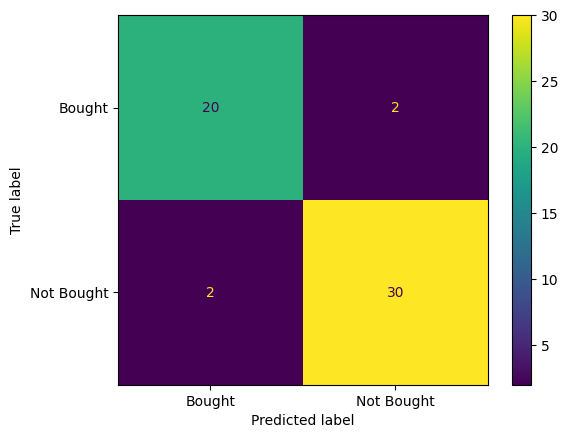

In [ ]:
#####################################################
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
################ Image Segmentation 
image = pd.read_csv("/content/Image_Segmention.csv")

train, test = train_test_split(image, test_size=0.3,
                               random_state=23,
                               stratify=image['Class'])

X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_test = test.drop('Class', axis=1)
y_test = test['Class']

print(image['Class'].value_counts(normalize=True)*100)
print(y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(normalize=True)*100)

SKY          14.354067
FOLIAGE      14.354067
CEMENT       14.354067
WINDOW       14.354067
PATH         14.354067
GRASS        14.354067
BRICKFACE    13.875598
Name: Class, dtype: float64
WINDOW       14.383562
PATH         14.383562
GRASS        14.383562
FOLIAGE      14.383562
CEMENT       14.383562
SKY          14.383562
BRICKFACE    13.698630
Name: Class, dtype: float64
FOLIAGE      14.285714
PATH         14.285714
BRICKFACE    14.285714
WINDOW       14.285714
SKY          14.285714
CEMENT       14.285714
GRASS        14.285714
Name: Class, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[-2.74445238e-03 -2.28500779e-03  2.09686884e-01 -4.21888669e-05
  -1.28350886e-04 -1.77886436e-02 -2.08553935e-02 -1.24039348e-02
  -1.49203094e-01 -3.30077089e-02  1.95136783e-01  1.74210319e-03
  -2.95902092e-01  6.84433571e-01  1.04249555e-01 -7.88683074e-01
  -1.24600056e-02  1.40884910e-02 -1.97405249e-02]
 [ 9.30287772e-03 -2.61248428e-02  2.67471063e-01  2.95459811e-03
  -3.20049593e-03 -1.42494759e-02 -3.42344427e-02 -2.26941024e-01
   1.14702766e-01  1.09444245e-02  4.40300843e-02  4.10333201e-02
  -5.22301513e-02  9.92570641e-02  9.02664675e-02 -1.89523769e-01
   3.13947240e-02  6.76217151e-03 -6.13324478e-02]
 [ 1.74253217e-02 -5.18721801e-03  2.58337592e-01 -9.80169425e-04
   2.03633824e-03  2.94292305e-01  1.91851459e-01  5.44158487e-01
   3.17403165e-02 -1.04938682e-01 -2.45059164e-01 -4.04974753e-02
  -2.92596258e-02 -4.20361342e-01  1.93324062e-01  2.27037271e-01
  -7.21389998e-02  7.68935050e-02 -2.03733789e-01]
 [-4.97132711e-02  4.74987762e-02 -1.94746598e-01  4.29

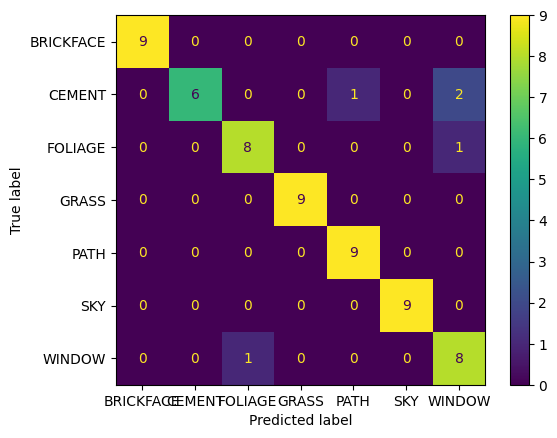

In [ ]:
#### Building the model on Train Set
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
print(confusion_matrix( y_test, y_pred   ))
print(accuracy_score( y_test, y_pred))

print(classification_report( y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

compare_df = pd.DataFrame({'Actual':y_test.values,
                        'Predicted':y_pred})


#####################################################
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

[[8 1 0 0 0 0 0]
 [1 6 0 0 0 0 2]
 [0 0 8 0 0 0 1]
 [0 0 0 9 0 0 0]
 [0 0 0 0 9 0 0]
 [0 0 0 0 0 9 0]
 [0 0 2 0 0 0 7]]
0.8888888888888888
              precision    recall  f1-score   support

   BRICKFACE       0.89      0.89      0.89         9
      CEMENT       0.86      0.67      0.75         9
     FOLIAGE       0.80      0.89      0.84         9
       GRASS       1.00      1.00      1.00         9
        PATH       1.00      1.00      1.00         9
         SKY       1.00      1.00      1.00         9
      WINDOW       0.70      0.78      0.74         9

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



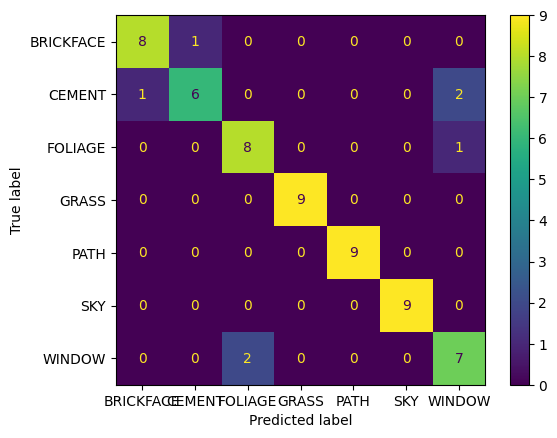

In [ ]:
#### Tree
dtc = DecisionTreeClassifier(random_state=23)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(confusion_matrix( y_test, y_pred   ))
print(accuracy_score( y_test, y_pred))

print(classification_report( y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

compare_df = pd.DataFrame({'Actual':y_test.values,
                        'Predicted':y_pred})

#####################################################
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
###### Predicting on the unlabelled data ##############
tst_img = pd.read_csv("/content/Image_Segmention.csv")
#predictions = lr.predict(tst_img)

#pred_probs = pd.DataFrame( lr.predict_proba(tst_img),columns = lr.classes_)

#np.max(pred_probs.iloc[0,:])
# Argmax Returns the index of the maximum value
# axis=1 ensures that the operation is row-wise
#np.argmax(pred_probs.values, axis=1)

## **classification_error-02**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

mowers = pd.read_csv("/content/RidingMowers.csv")

train, test = train_test_split(mowers, test_size=0.3,
                               random_state=23,
                               stratify=mowers['Response'])

X_train = train.drop('Response', axis=1)
y_train = train['Response']
X_test = test.drop('Response', axis=1)
y_test = test['Response']

#### Building the logistic regression model on Train Set
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

print(classification_report( y_test, y_pred))

##### D Tree
dtc = DecisionTreeClassifier(random_state=23)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report( y_test, y_pred))


              precision    recall  f1-score   support

      Bought       0.91      0.91      0.91        22
  Not Bought       0.94      0.94      0.94        32

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54

              precision    recall  f1-score   support

      Bought       0.83      0.86      0.84        22
  Not Bought       0.90      0.88      0.89        32

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



## **classification_error-03**

['Bought' 'Not Bought']


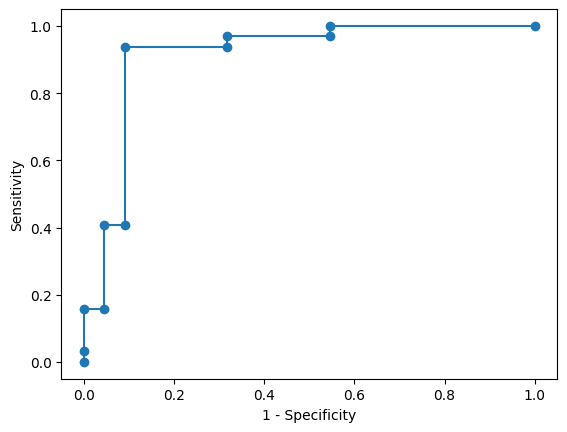

0.9133522727272727
0.34837790456933476


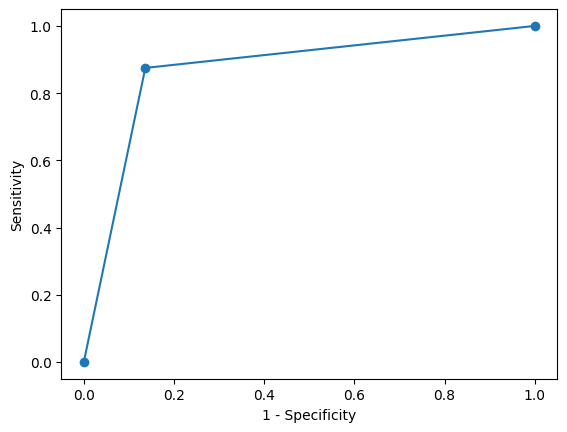

0.8693181818181819
4.6723254393300016


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, log_loss
import numpy as np
from sklearn.preprocessing import LabelEncoder


mowers = pd.read_csv("/content/RidingMowers.csv")
lbl = LabelEncoder()
mowers['Response'] = lbl.fit_transform(mowers['Response'])
print(lbl.classes_)

train, test = train_test_split(mowers, test_size=0.3,
                               random_state=23,
                               stratify=mowers['Response'])

X_train = train.drop('Response', axis=1)
y_train = train['Response']
X_test = test.drop('Response', axis=1)
y_test = test['Response']

#### Building the logistic regression model on Train Set
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(fpr, tpr )
plt.plot(fpr, tpr)
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.show()

print(roc_auc_score(y_test, y_pred_prob[:,1]))
print(log_loss(y_test, y_pred_prob[:,1]))

#### Building the D tree model on Train Set
dtc = DecisionTreeClassifier(random_state=23)
dtc.fit(X_train, y_train)

y_pred_prob = dtc.predict_proba(X_test)

fpr, tpr, thres = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(fpr, tpr )
plt.plot(fpr, tpr)
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.show()

print(roc_auc_score(y_test, y_pred_prob[:,1]))
print(log_loss(y_test, y_pred_prob[:,1]))

In [ ]:
#################### Image Segmenation ######################
image = pd.read_csv("/content/Image_Segmention.csv")
lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])
print(lbl.classes_)

train, test = train_test_split(image, test_size=0.3,
                               random_state=23,
                               stratify=image['Class'])

X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_test = test.drop('Class', axis=1)
y_test = test['Class']

#### Building the model on Train Set
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_prob = lr.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
0.27163435436137845


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Linear Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

boston = pd.read_csv("/content/Boston.csv")

X = boston.drop('medv', axis=1)
y = boston['medv']

train, test = train_test_split(boston, test_size=0.3)

X_train = train.drop('medv', axis=1)
y_train = train['medv']
X_test = test.drop('medv', axis=1)
y_test = test['medv']

## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Linear Regression:')
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print('-----------------------')

## Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print('Ridge Regression:')
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print('-----------------------')

## Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print('Lasso Regression:')
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print('-----------------------')

## ElasticNet
elastic = ElasticNet()
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)
print('ElasticNet Regression:')
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print('-----------------------')


## Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Decision Tree Regression:')
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print('-----------------------')

Linear Regression:
3.499733181675807
24.817655903484155
0.7398805301719966
-----------------------
Ridge Regression:
3.5252699346267264
25.234022482562693
0.7355164977982218
-----------------------
Lasso Regression:
4.002127013923206
33.12969858373854
0.6527601291323495
-----------------------
ElasticNet Regression:
3.9366123689558568
31.91193633301366
0.6655237709632704
-----------------------
Decision Tree Regression:
2.828289473684211
15.81809210526316
0.834206995692372
-----------------------


## **Regresion_errors**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

yi = np.array([24, 56, 78, 20])
yicap = np.array([23.78, 45.9, 89.2, 19.3])

mae1 = np.mean(np.absolute(yi - yicap))
print(mae1)
print(mean_absolute_error(yi, yicap))

mse1 = np.mean((yi - yicap)**2)
print(mse1)
print(mean_squared_error(yi, yicap))

sse = np.sum((yi - yicap)**2)
sqd = np.sum((yi - np.mean(yi))**2)
r2 = 1 - (sse/sqd) 
print(r2)
print(r2_score(yi, yicap))

yicap = np.array([24.01, 55.9, 67.8, 23.8])
mae2 = np.mean(np.absolute(yi - yicap))
print(mae2)
print(mean_absolute_error(yi, yicap))

mse2 = np.mean((yi - yicap)**2)
print(mse2)
print(mean_absolute_error(yi, yicap))

sse = np.sum((yi - yicap)**2)
sqd = np.sum((yi - np.mean(yi))**2)
r2 = 1 - (sse/sqd) 
print(r2)
print(r2_score(yi, yicap))

5.555000000000001
5.555000000000001
56.99710000000003
56.99710000000003
0.8997853186813186
0.8997853186813186
3.5275000000000016
3.5275000000000016
29.622525000000017
3.5275000000000016
0.9479164395604396
0.9479164395604396


linear_reg_1

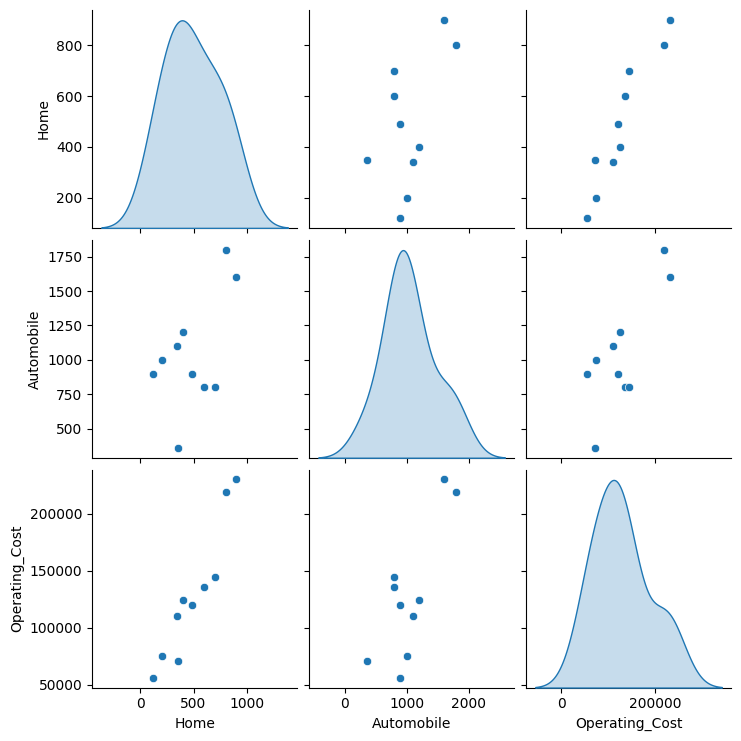

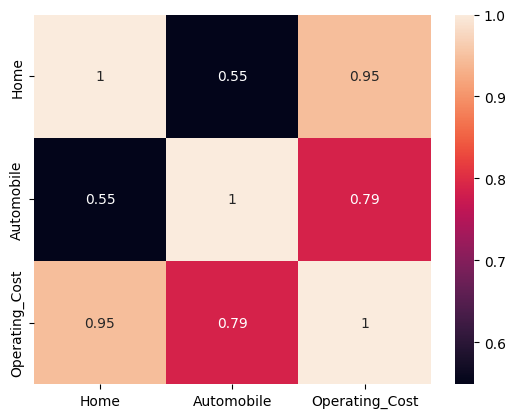

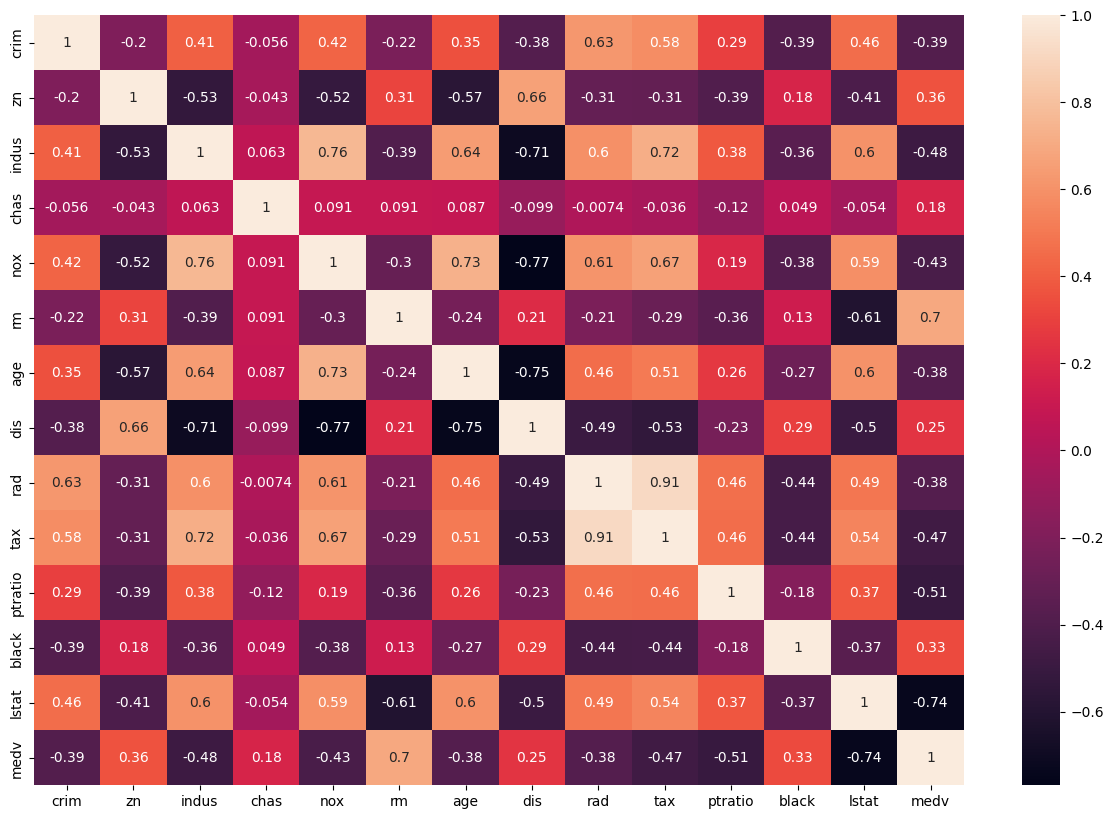

0.7185747399235817


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

pizza = pd.read_csv("/content/pizza.csv")
pizza.corr()

insure = pd.read_csv("/content/Insure_auto.csv", index_col=0)
insure.corr()


sns.pairplot(insure, diag_kind='kde')
plt.show()

sns.heatmap(
    insure.corr(),
    xticklabels=insure.corr().columns, 
    yticklabels=insure.corr().columns, 
    annot=True)
plt.show()

boston = pd.read_csv("/content/Boston.csv")
plt.figure( figsize=(15,10) )
sns.heatmap(
    boston.corr(),
   # xticklabels=insure.corr().columns, 
    #yticklabels=insure.corr().columns, 
    annot=True)
plt.show()

############### Linear Regression ###################
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X = boston.drop('medv', axis=1)
y = boston['medv']
lr = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(lr, X, y, cv=kfold)
print(results.mean())


## **polynomial fitting**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pizza = pd.read_csv("/content/pizza.csv")
X = pizza[['Promote']]
y = pizza['Sales']

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(poly.get_feature_names_out())

lr = LinearRegression()
lr.fit(X_poly, y)

insure = pd.read_csv("/content/Insure_auto.csv", index_col=0)
X = insure[['Home', 'Automobile']]
y = insure['Operating_Cost']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(poly.get_feature_names_out())

####################################################
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

boston = pd.read_csv("/content/Boston.csv")
X = boston.drop('medv', axis=1)
y = boston['medv']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(lr, X_poly, y, cv=kfold)
print(results.mean())

### With Grid Search
poly = PolynomialFeatures()
lr = LinearRegression()
pipe = Pipeline([('POLY',poly),('LIN', lr)])
params = {'POLY__degree':[1,2,3,4,5],
          'POLY__interaction_only':[True, False]}
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold)
gcv.fit(X, y)
pd_cv = pd.DataFrame( gcv.cv_results_ )
print(gcv.best_params_)
print(gcv.best_score_)

################### Medical Expenses ######################
medical = pd.read_csv("/content/insurance.csv")
dum_med = pd.get_dummies(medical, drop_first=True)
X = dum_med.drop('charges', axis=1)
y = dum_med['charges']

poly = PolynomialFeatures()
lr = LinearRegression()
pipe = Pipeline([('POLY',poly),('LIN', lr)])
params = {'POLY__degree':[1,2,3,4,5],
          'POLY__interaction_only':[True, False]}
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold)
gcv.fit(X, y)
pd_cv = pd.DataFrame( gcv.cv_results_ )
print(gcv.best_params_)
print(gcv.best_score_)

['1' 'Promote' 'Promote^2' 'Promote^3']
['1' 'Home' 'Automobile' 'Home^2' 'Home Automobile' 'Automobile^2']
0.8000466867837501
{'POLY__degree': 2, 'POLY__interaction_only': True}
0.8320881313985347
{'POLY__degree': 3, 'POLY__interaction_only': False}
0.8248094824753022


## **regularize_regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score 
import numpy as np 

boston = pd.read_csv("/content/Boston.csv")
X = boston.drop('medv', axis=1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=23)

ridge = Ridge()
ridge.fit(X_train, y_train)
print(ridge.coef_)
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred))

### Grid Search
## Ridge
params = {'alpha': np.linspace(0.01, 20, 40)}
ridge = Ridge()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(ridge, param_grid=params,cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)


## Lasso
params = {'alpha': np.linspace(0.01, 20, 40)}
lasso = Lasso()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lasso, param_grid=params,cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

## Elastic Net
params = {'alpha': np.linspace(0.01, 20, 40),
          'l1_ratio': np.linspace(0.02, 1)}
elastic = ElasticNet()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(elastic, param_grid=params,
                   verbose=3, cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)



Streaming output truncated to the last 5000 lines.
[CV 3/5] END alpha=10.26128205128205, l1_ratio=0.02;, score=0.607 total time=   0.0s
[CV 4/5] END alpha=10.26128205128205, l1_ratio=0.02;, score=0.576 total time=   0.0s
[CV 5/5] END alpha=10.26128205128205, l1_ratio=0.02;, score=0.585 total time=   0.0s
[CV 1/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.577 total time=   0.0s
[CV 2/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.613 total time=   0.0s
[CV 3/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.604 total time=   0.0s
[CV 4/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.573 total time=   0.0s
[CV 5/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.583 total time=   0.0s
[CV 1/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.572 total time=   0.0s
[CV 2/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.610 total time=   0.0s
[CV 3/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.601 total time=   0.0s
[CV 4/5] END a

FileNotFoundError: ignored

In [ ]:
###################### Housing ##############################
housing = pd.read_csv("/content/Housing (1).csv")
dum_house = pd.get_dummies(housing, drop_first=True)
X = dum_house.drop('price', axis=1)
y = dum_house['price']

kfold = KFold(n_splits=5, shuffle=True, random_state=23)

### Linear Regression
lr = LinearRegression()
results = cross_val_score(lr, X, y, cv=kfold)
print(results.mean())

## Ridge
params = {'alpha': np.linspace(0.01, 20, 40)}
ridge = Ridge()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(ridge, param_grid=params,cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)
best_ridge = gcv.best_estimator_
print(best_ridge.coef_)

## Lasso
params = {'alpha': np.linspace(0.01, 20, 40)}
lasso = Lasso()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lasso, param_grid=params,cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)
best_lasso = gcv.best_estimator_
print(best_lasso.coef_)


## Elastic Net
params = {'alpha': np.linspace(0.01, 20, 40),
          'l1_ratio': np.linspace(0.02, 1)}
elastic = ElasticNet()
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(elastic, param_grid=params,
                   verbose=3, cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

## K-NN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
knn = KNeighborsRegressor()

pipe = Pipeline([('SCL', scaler),('KNN', knn)])
params = {'KNN__n_neighbors': np.arange(1,21)}
gcv = GridSearchCV(pipe, param_grid=params,cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

Streaming output truncated to the last 5000 lines.
[CV 5/5] END alpha=10.26128205128205, l1_ratio=0.02;, score=0.284 total time=   0.0s
[CV 1/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.339 total time=   0.0s
[CV 2/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.372 total time=   0.0s
[CV 3/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.346 total time=   0.0s
[CV 4/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.298 total time=   0.0s
[CV 5/5] END alpha=10.26128205128205, l1_ratio=0.04;, score=0.285 total time=   0.0s
[CV 1/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.340 total time=   0.0s
[CV 2/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.373 total time=   0.0s
[CV 3/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.347 total time=   0.0s
[CV 4/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.299 total time=   0.0s
[CV 5/5] END alpha=10.26128205128205, l1_ratio=0.06;, score=0.286 total time=   0.0s
[CV 1/5] END a

### **Logistics Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

cancer = pd.read_csv("/content/BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']
# Logistic Reg without regularization
lr = LogisticRegression(penalty=None)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(lr, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())


##### Grid Search
import warnings
warnings.filterwarnings("ignore")
params = {'C': np.linspace(0.01, 20, 10),
          'l1_ratio': np.linspace(0, 1, 10),
          'penalty':[None, 'l1', 'l2', 'elasticnet']}
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lr, param_grid=params, verbose=1,
                   cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

0.9936394821903918
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'C': 0.01, 'l1_ratio': 0.0, 'penalty': 'l2'}
0.9946401452363075


In [ ]:
################### HR Data ##############################
hr = pd.read_csv("/content/HR_comma_sep (1).csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

params = {'C': np.linspace(0.01, 20, 10),
          'l1_ratio': np.linspace(0, 1, 10),
          'penalty':[None, 'l1', 'l2', 'elasticnet']}
lr = LogisticRegression(n_jobs=-1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lr, param_grid=params, verbose=2,
                   n_jobs = -1,
                   cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'C': 0.01, 'l1_ratio': 0.0, 'penalty': 'l2'}
0.8189140460098475


In [ ]:
############## Image Segmentation ####################
image = pd.read_csv("/content/Image_Segmention.csv")

lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])

X = image.drop('Class', axis=1)
y = image['Class']


params = {'C': np.linspace(0.01, 20, 10),
          'l1_ratio': np.linspace(0, 1, 10),
          'penalty':[None, 'l1', 'l2', 'elasticnet'],
          'multi_class':['ovr','multinomial']}
lr = LogisticRegression(n_jobs=-1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lr, param_grid=params, verbose=2,
                   n_jobs = -1,
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
{'C': 0.01, 'l1_ratio': 0.0, 'multi_class': 'multinomial', 'penalty': 'l2'}
-0.534161174008472


## **support vector machine (SVC)**

In [ ]:
########### BreastCancer##########
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

cancer = pd.read_csv("/content/BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

svm = SVC(probability=True, random_state=23,kernel='linear')
params = {"C": np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params, verbose=3,
                   cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ............................C=0.01;, score=0.995 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.998 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.998 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.993 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.5357894736842106;, score=0.995 total time=   0.0s
[CV 2/5] END ..............C=0.5357894736842106;, score=0.998 total time=   0.0s
[CV 3/5] END ..............C=0.5357894736842106;, score=0.997 total time=   0.0s
[CV 4/5] END ..............C=0.5357894736842106;, score=0.994 total time=   0.0s
[CV 5/5] END ..............C=0.5357894736842106;, score=0.986 total time=   0.0s
[CV 1/5] END ..............C=1.0615789473684212;, score=0.995 total time=   0.0s
[CV 2/5] END ..............C=1.0615789473684212

In [ ]:
############ HR Data ###################
'''from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
hr = pd.read_csv("/content/HR_comma_sep (1).csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

scaler = StandardScaler()
svm = SVC(probability=True,
          random_state=23,kernel='linear')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)'''

'from sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nhr = pd.read_csv("/content/HR_comma_sep (1).csv")\ndum_hr = pd.get_dummies(hr, drop_first=True)\nX = dum_hr.drop(\'left\', axis=1)\ny = dum_hr[\'left\']\n\nscaler = StandardScaler()\nsvm = SVC(probability=True,\n          random_state=23,kernel=\'linear\')\npipe = Pipeline([(\'SCL\',scaler),(\'SVM\',svm)])\n\nparams = {\'SVM__C\': np.linspace(0.01, 10, 20)}\nkfold = StratifiedKFold(n_splits=5, \n                        shuffle=True, random_state=23)\ngcv = GridSearchCV(pipe, param_grid=params, verbose=3,\n                   n_jobs=-1,cv=kfold, scoring=\'roc_auc\')\ngcv.fit(X,y)\nprint(gcv.best_params_)\nprint(gcv.best_score_)'

In [ ]:
############### Kyphosis ##########################
kyp = pd.read_csv("/content/Kyphosis.csv")
lbl = LabelEncoder()
kyp['Kyphosis'] = lbl.fit_transform(kyp['Kyphosis'])
X = kyp.drop('Kyphosis', axis=1)
y = kyp['Kyphosis']

svm = SVC(probability=True,
          random_state=23,kernel='linear')
params = {'C': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

### Radial

svm = SVC(probability=True,
          random_state=23,kernel='rbf')
params = {'C': np.linspace(0.01, 10, 20),
          'gamma': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

# with scl

scaler = StandardScaler()
svm = SVC(probability=True,
          random_state=23,kernel='rbf')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 20),
          'SVM__gamma': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

## Poly

scaler = StandardScaler()
svm = SVC(probability=True,
          random_state=23,kernel='poly')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 20),
          'SVM__degree': [2,3,4]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 4.2163157894736845}
0.8509615384615383
{'C': 0.5357894736842106, 'gamma': 0.01}
0.6695512820512819
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'SVM__C': 0.01, 'SVM__gamma': 5.793684210526316}
0.8493589743589742
Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'SVM__C': 10.0, 'SVM__degree': 3}
0.7147435897435898


In [ ]:
###################### Bankruptcy ########################
brupt = pd.read_csv("/content/Bankruptcy.csv", index_col=0)
X = brupt.drop(['D','YR'],axis=1)
y = brupt['D']

scaler = StandardScaler()
svm = SVC(probability=True,
          random_state=23,kernel='linear')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

## RBF

scaler = StandardScaler()
svm = SVC(probability=True,
          random_state=23,kernel='rbf')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 20),
          'SVM__gamma': np.linspace(0.01, 10, 20)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'SVM__C': 0.01}
0.8669484361792055
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'SVM__C': 0.01, 'SVM__gamma': 0.01}
0.8623837700760777


In [ ]:
import os
os.chdir(r"C:\Training\Kaggle\Datasets\Diabetes prediction dataset")
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Diabetes = pd.read_csv("diabetes_prediction_dataset.csv")
print(Diabetes["diabetes"].value_counts())

dum_diab = pd.get_dummies(Diabetes, drop_first=True)
X = dum_diab.drop("diabetes", axis=1)
y = Diabetes["diabetes"]
params = {'C': np.linspace(0.01, 20, 5),
          'l1_ratio': np.linspace(0, 1, 5),
          'penalty':[None, 'l1', 'l2', 'elasticnet']}
lr = LogisticRegression(n_jobs=-1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(lr, param_grid=params, verbose=2,
                   n_jobs = -1,
                   cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

############ LDA #####################
lda = LinearDiscriminantAnalysis()
results = cross_val_score(lda, X,y,cv=kfold, 
                          scoring='roc_auc')
print(results.mean())


############ QDA #####################
qda = QuadraticDiscriminantAnalysis()
results = cross_val_score(qda, X,y,cv=kfold, 
                          scoring='roc_auc')
print(results.mean())

############ SVM - RBF################
scaler = MinMaxScaler()
svm = SVC(probability=True,
          random_state=23,kernel='rbf')
pipe = Pipeline([('SCL',scaler),('SVM',svm)])

params = {'SVM__C': np.linspace(0.01, 10, 5),
          'SVM__gamma': np.linspace(0.01, 10, 5)}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params, verbose=3,
                   n_jobs=-1,cv=kfold, scoring='roc_auc')
gcv.fit(X,y)
pd_cv = pd.DataFrame( gcv.cv_results_ )
print(gcv.best_params_)
print(gcv.best_score_)

## **Naives Bayes**

In [ ]:
############# BernauliNB #############

import pandas as pd 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report

telecom = pd.read_csv("/content/Telecom.csv")
dum_tel = pd.get_dummies(telecom, drop_first=True)

X = dum_tel.drop('Response_Y', axis=1)
y = dum_tel['Response_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=23)
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred_prob = nb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

################### K-Folds CV ####################################
from sklearn.model_selection import cross_val_score, StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(nb, X, y, scoring='roc_auc',cv=kfold)
print(results.mean())

0.8972332015810276
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.75      0.91      0.82        23

    accuracy                           0.80        45
   macro avg       0.82      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45

0.8783035714285713


In [ ]:
############# GaussianNB #################

import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report

brupt = pd.read_csv("Bankruptcy.csv")

X = brupt.drop(['D','NO','YR'], axis=1)
y = brupt['D']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=23)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_prob = nb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

################### K-Folds CV ####################################
from sklearn.model_selection import cross_val_score, StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(nb, X, y, scoring='roc_auc',cv=kfold)
print(results.mean())

##### Logisitic
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(lr, X, y, scoring='roc_auc',cv=kfold)
print(results.mean())

######################## K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('SCL',scaler),('KNN',knn)])
params = {'KNN__n_neighbors': np.arange(1,23,2)}
gcv = GridSearchCV(pipe, param_grid=params, 
                   cv=kfold, scoring='roc_auc')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

################### Image Seg ####################################
from sklearn.preprocessing import LabelEncoder
image = pd.read_csv("/content/Image_Segmention.csv")
lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])
print(lbl.classes_)

X = image.drop('Class', axis=1)
y = image['Class']

nb = GaussianNB()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(nb, X, y, scoring='neg_log_loss',cv=kfold)
print(results.mean())

0.8425
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.92      0.55      0.69        20

    accuracy                           0.75        40
   macro avg       0.80      0.75      0.74        40
weighted avg       0.80      0.75      0.74        40

0.868131868131868
0.8672865595942518
{'KNN__n_neighbors': 21}
0.869526627218935
['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
-3.795338814659644


## **DecisionTreeRegressor**

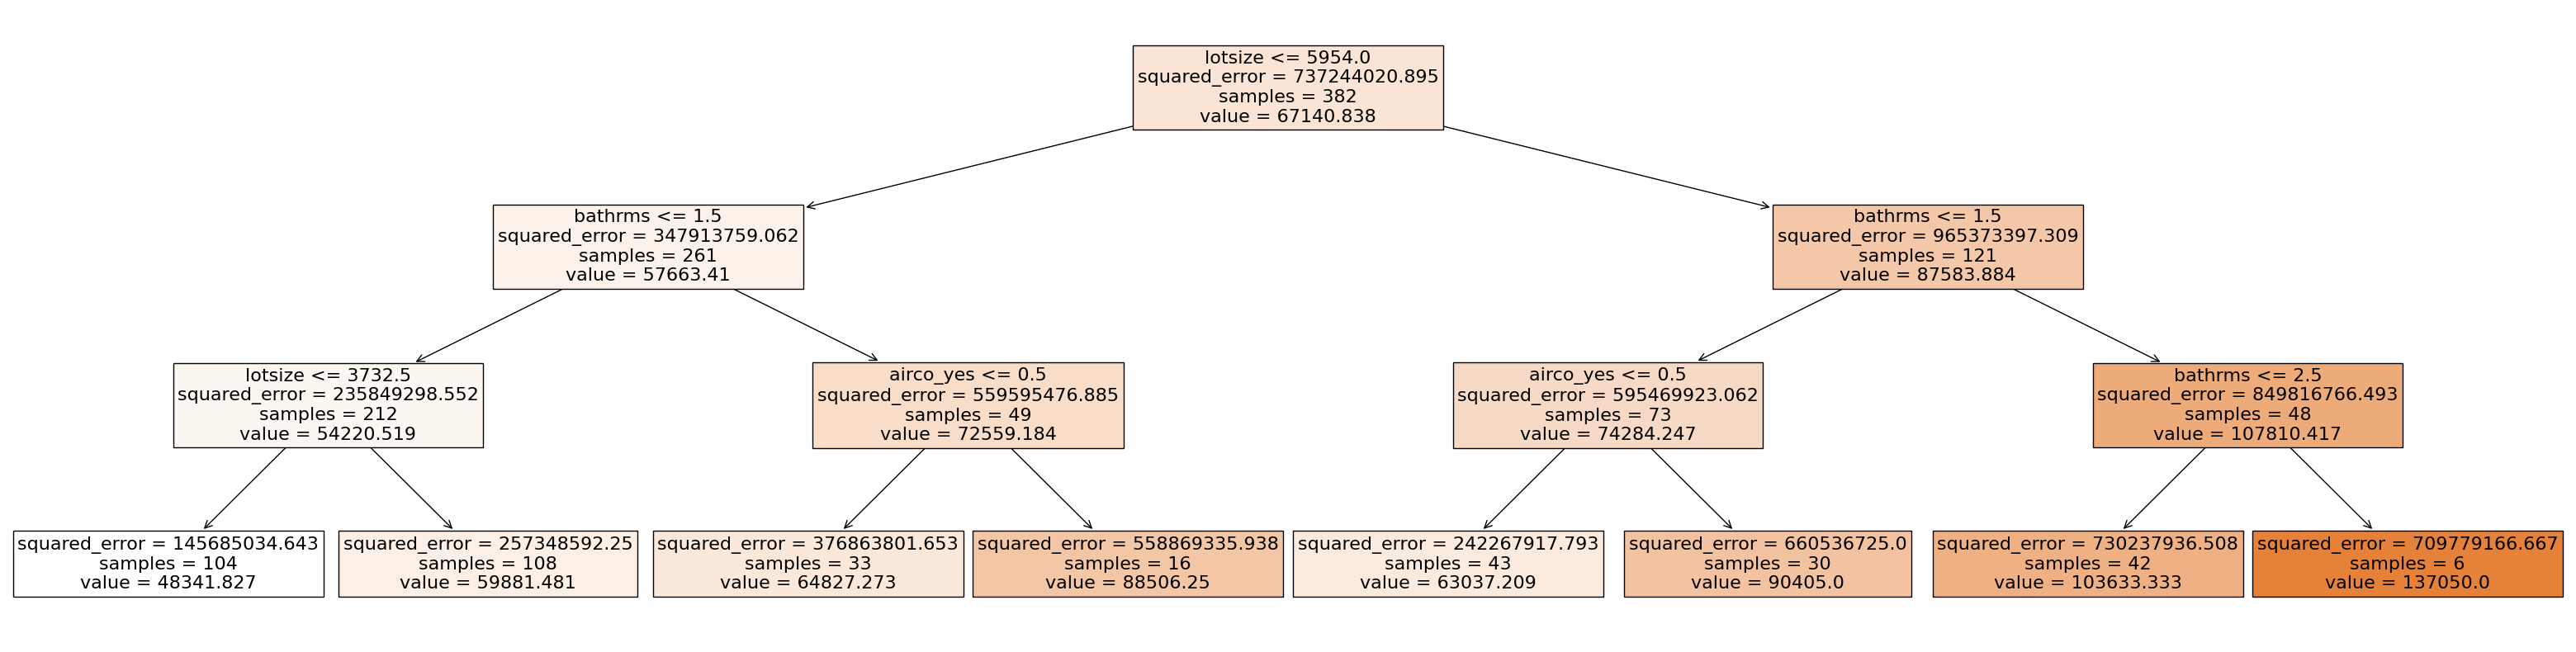

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.5023839488873014


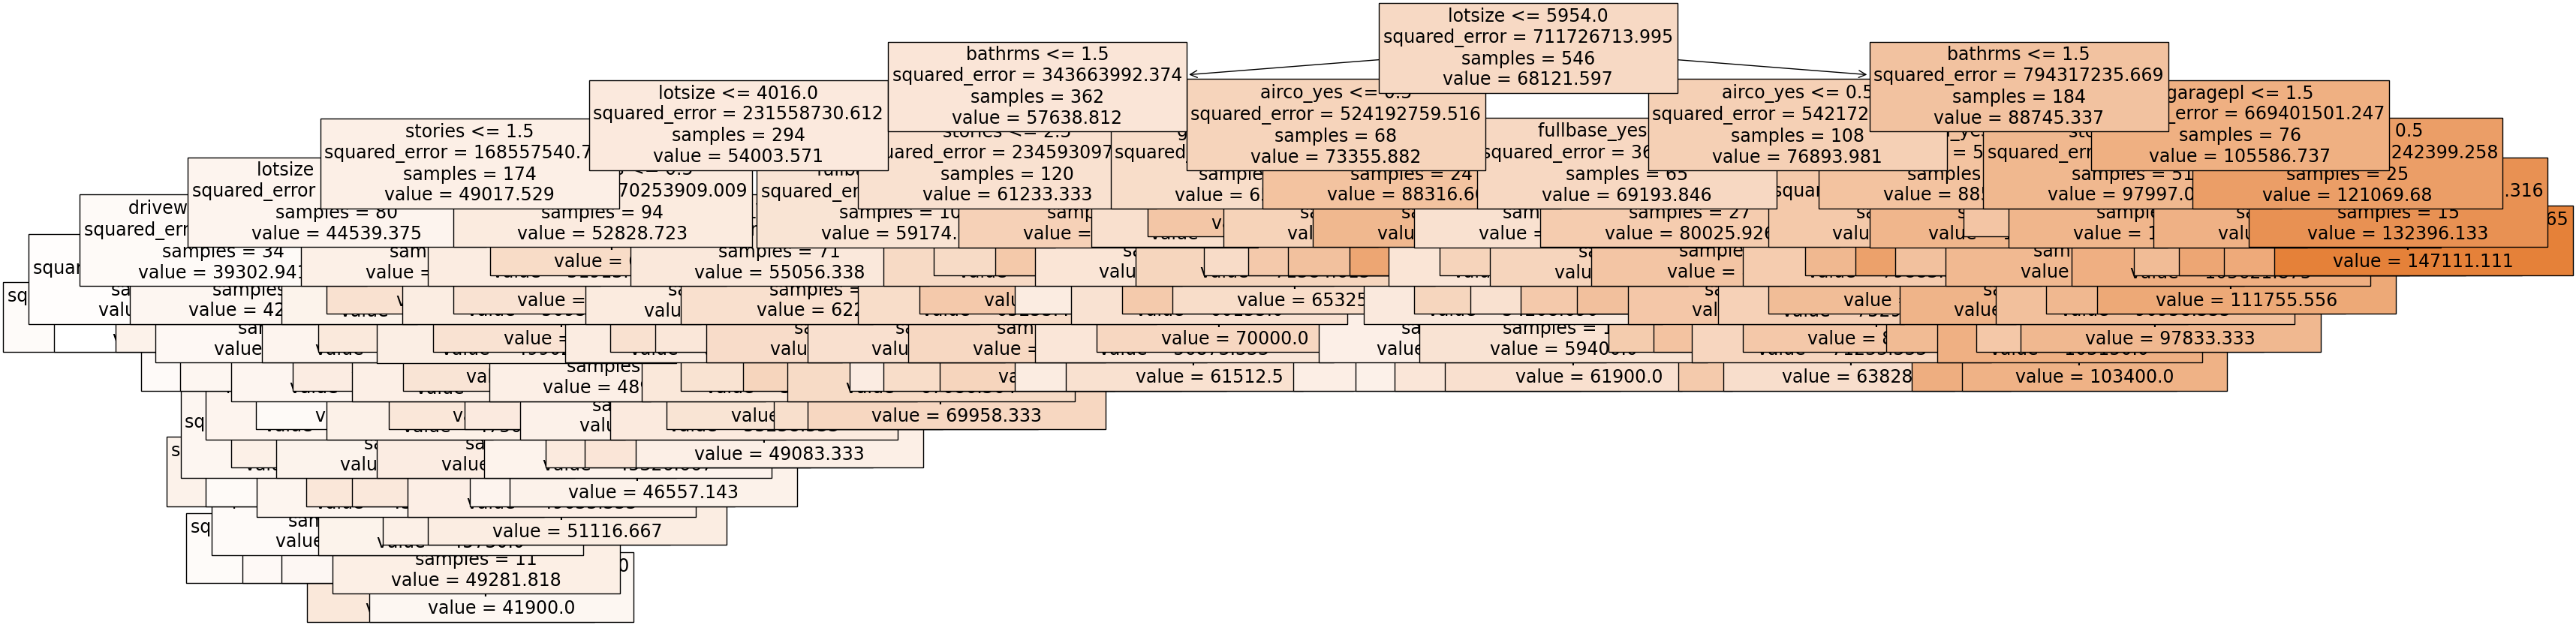

[0.51975876 0.00650834 0.19711932 0.03562436 0.04829034 0.00212216
 0.02129921 0.04124271 0.00782892 0.0907386  0.02946728]
Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_yes',
       'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')


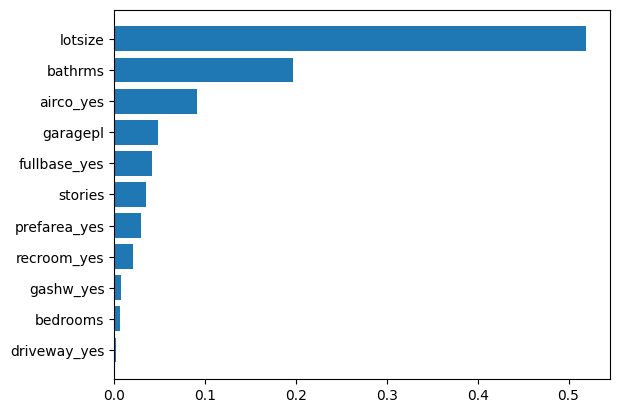

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

housing = pd.read_csv("/content/Housing (1).csv")
dum_hous = pd.get_dummies(housing, drop_first=True)

X = dum_hous.drop('price', axis=1)
y = dum_hous['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3)
dtr = DecisionTreeRegressor(random_state=23, max_depth=3)
dtr.fit(X_train, y_train)

### Drawing a tree
from sklearn import tree
plt.figure(figsize=(40,10))
tree.plot_tree(dtr,feature_names=X_train.columns,
               filled=True,fontsize=16) 
plt.show()

# dtr.predict(X_test)


#################### Grid Search CV ####################
dtr = DecisionTreeRegressor(random_state=23)
kfold = KFold(n_splits=5,
              random_state=23, shuffle=True)
params = {'max_depth':[3,4,5,6,None],
          'min_samples_split':[2,5,7,10],
          'min_samples_leaf':[1,5,7,10]}
gcv = GridSearchCV(dtr, param_grid=params,
                   scoring='r2',cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

best_tree = gcv.best_estimator_
plt.figure(figsize=(40,10))
tree.plot_tree(best_tree,feature_names=X.columns,
               filled=True,fontsize=17) 
plt.show()

print(best_tree.feature_importances_)
print(X.columns)

df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_tree.feature_importances_})
df_imp = df_imp.sort_values(by='Importance')

plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8423769153142352


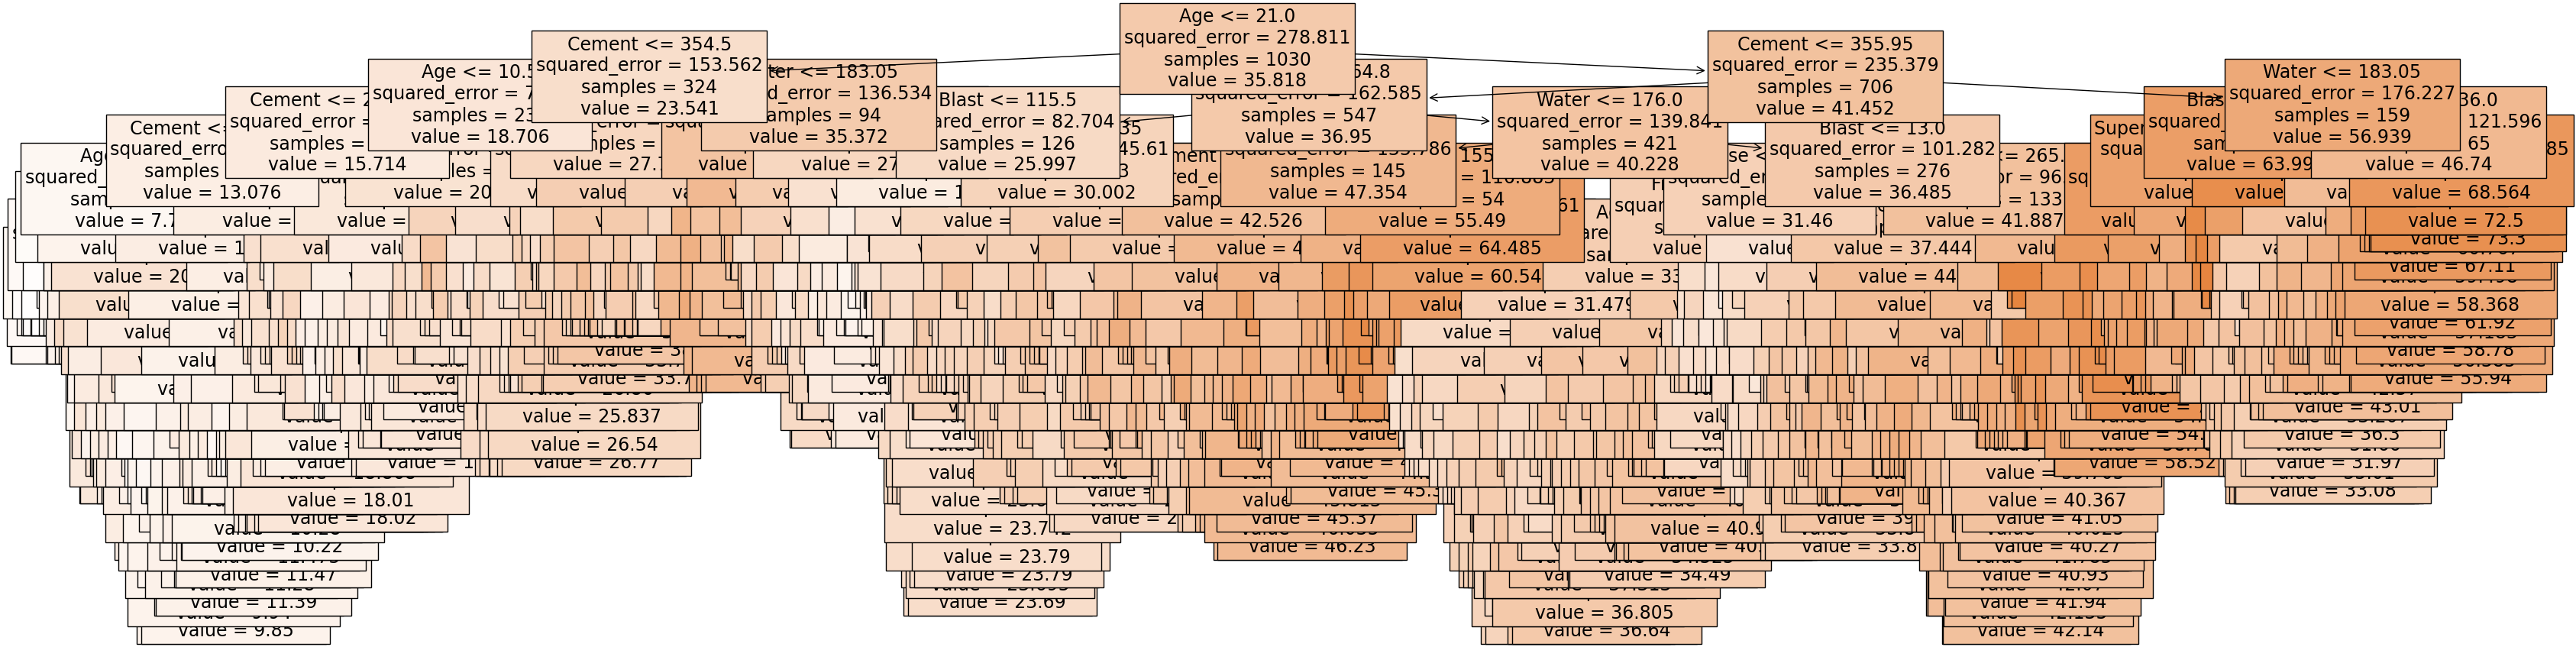

[0.36246075 0.10938145 0.01205222 0.10918815 0.02557399 0.03246754
 0.02678083 0.32209506]
Index(['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age'],
      dtype='object')


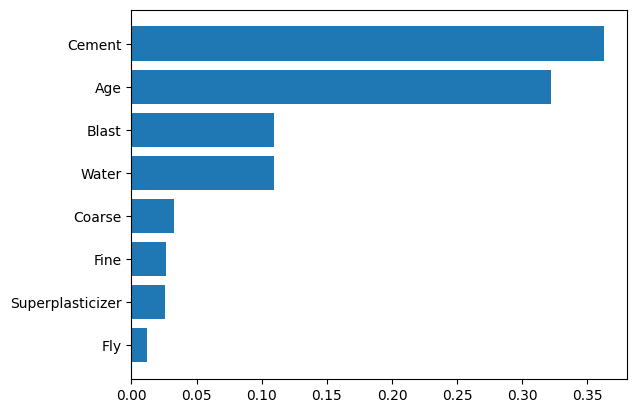

In [ ]:
##################### Concrete ############################
concrete = pd.read_csv("/content/Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

dtr = DecisionTreeRegressor(random_state=23)
kfold = KFold(n_splits=5,
              random_state=23, shuffle=True)
params = {'max_depth':[3,4,5,6,None],
          'min_samples_split':[2,5,7,10],
          'min_samples_leaf':[1,5,7,10]}
gcv = GridSearchCV(dtr, param_grid=params,
                   scoring='r2',cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

best_tree = gcv.best_estimator_
plt.figure(figsize=(40,10))
tree.plot_tree(best_tree,feature_names=X.columns,
               filled=True,fontsize=17) 
plt.show()

print(best_tree.feature_importances_)
print(X.columns)

df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_tree.feature_importances_})
df_imp = df_imp.sort_values(by='Importance')

plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()

####### Prediction on unlabelled data 
testConc = pd.read_csv("/content/testConcrete.csv")
predictions = best_tree.predict(testConc)
testConc['predictions'] = predictions

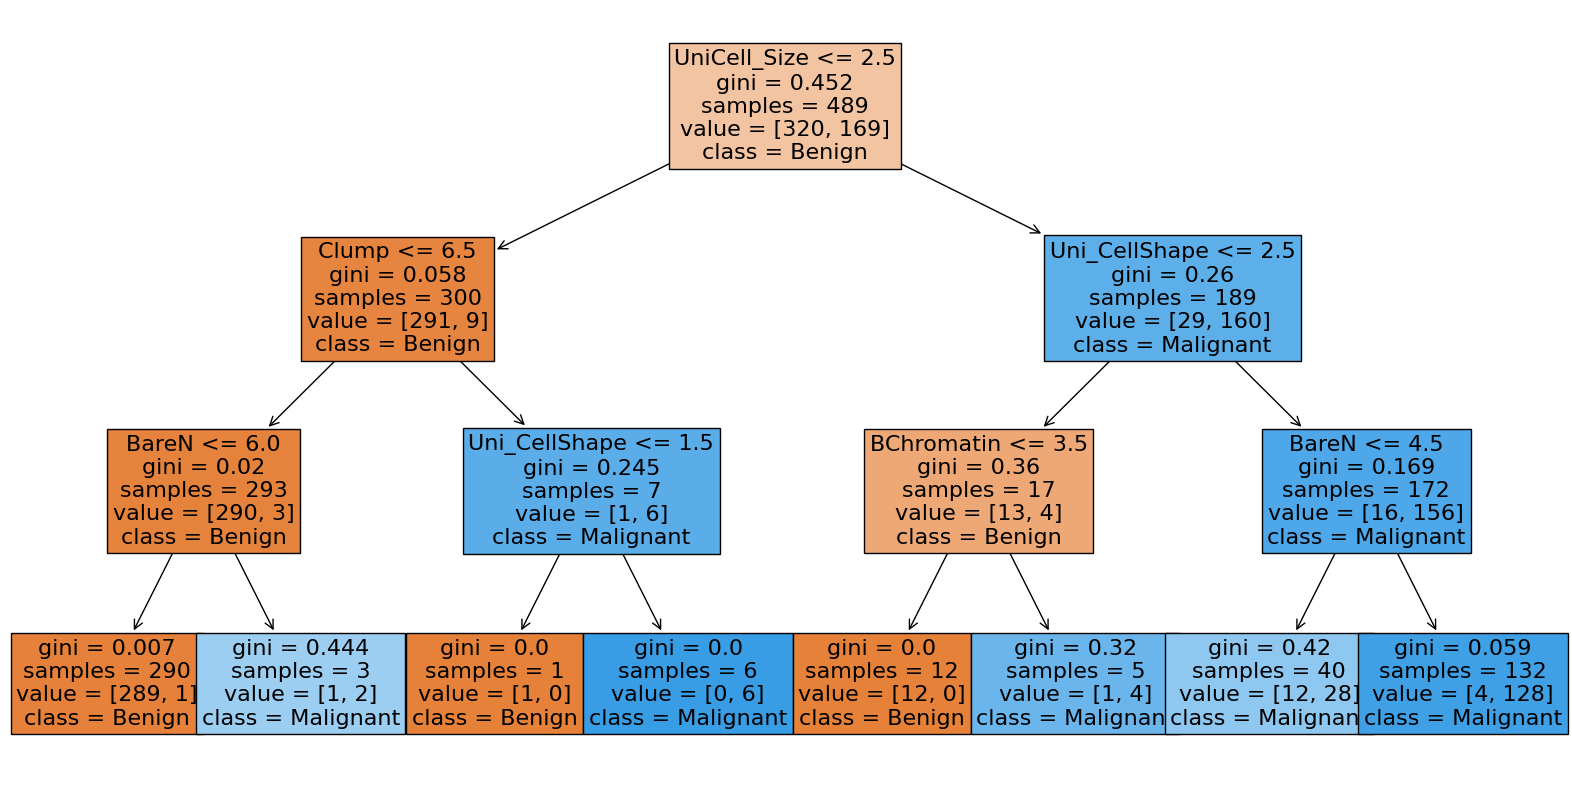

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9750567672123793


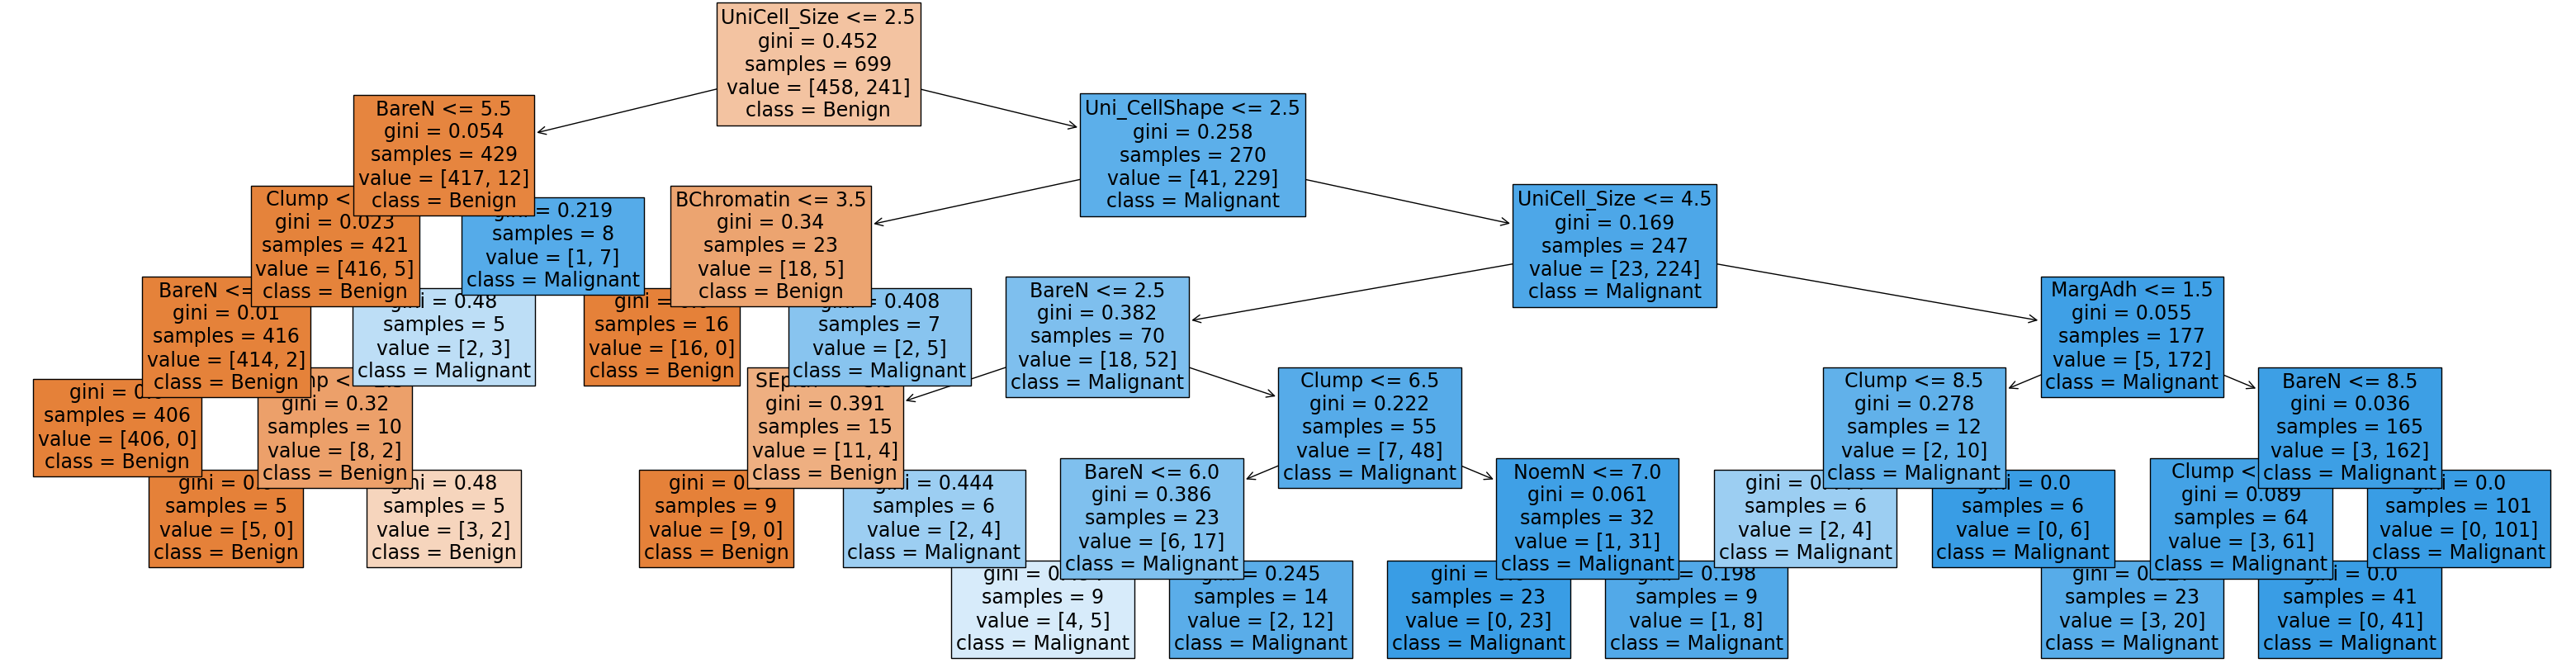

[2.40370730e-02 7.97308650e-01 6.98982789e-02 1.72347146e-03
 1.11806712e-02 7.79325013e-02 1.73612907e-02 5.58063015e-04
 0.00000000e+00]
Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')


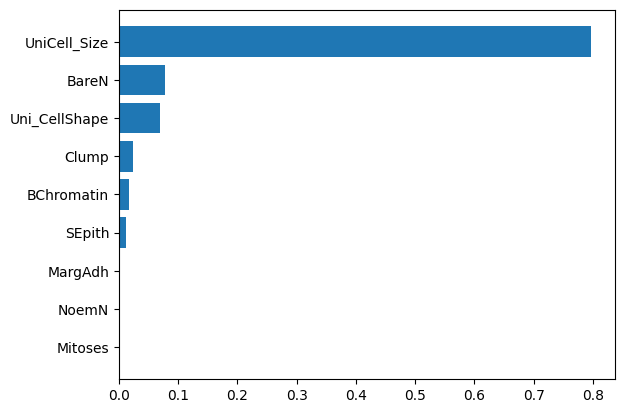

In [ ]:
############### BreastCancer #############

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

cancer = pd.read_csv("/content/BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3,
                                                    stratify=y)
dtc = DecisionTreeClassifier(random_state=23, max_depth=3)
dtc.fit(X_train, y_train)

### Drawing a tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtc,feature_names=X_train.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=16) 
plt.show()

# dtc.predict(X_test)
# dtc.predict_proba(X_test)

#################### Grid Search CV ####################
dtc = DecisionTreeClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5,
                        random_state=23, shuffle=True)
params = {'max_depth':[3,4,5,6,None],
          'min_samples_split':[2,5,7,10],
          'min_samples_leaf':[1,5,7,10]}
gcv = GridSearchCV(dtc, param_grid=params,
                   scoring='roc_auc',cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

best_tree = gcv.best_estimator_
plt.figure(figsize=(40,10))
tree.plot_tree(best_tree,feature_names=X.columns,
               class_names=['Benign','Malignant'],
               filled=True,fontsize=17) 
plt.show()

print(best_tree.feature_importances_)
print(X.columns)

df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_tree.feature_importances_})
df_imp = df_imp.sort_values(by='Importance')

plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()

## **K-Nearest Neighbors**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

################# Breast Cancer ########################
cancer = pd.read_csv("/content/BreastCancer.csv")

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
print(lbl.classes_)

knn = KNeighborsClassifier(n_neighbors=1)
X = cancer.drop(['Code','Class'], axis=1)
y = cancer['Class']

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
# Default scoring= is accuracy score
results = cross_val_score(knn, X, y, 
                          cv=kfold, scoring="roc_auc")
print(results.mean())


k = [1,3,5,7,9,11,13,15,17,19,21]
scores = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    results = cross_val_score(knn, X, y, 
                              cv=kfold, scoring="roc_auc")
    auc = results.mean()
    scores.append(auc)
    print("k =",i, "Mean ROC AUC =", auc)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))    

############### Grid Search CV #######################
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[1,3,5,7,9,11,13,15,17,19,21]}

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
knn = KNeighborsClassifier()
gcv = GridSearchCV(knn, param_grid=params,
                   cv=kfold, scoring="roc_auc")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

['Benign' 'Malignant']
0.9463182262871704
k = 1 Mean ROC AUC = 0.9463182262871704
k = 3 Mean ROC AUC = 0.9802833221200569
k = 5 Mean ROC AUC = 0.9902633870676795
k = 7 Mean ROC AUC = 0.9903069096128657
k = 9 Mean ROC AUC = 0.98973701819476
k = 11 Mean ROC AUC = 0.9902005917034755
k = 13 Mean ROC AUC = 0.9911628208378431
k = 15 Mean ROC AUC = 0.9913505467284859
k = 17 Mean ROC AUC = 0.9912169827916832
k = 19 Mean ROC AUC = 0.9914379727046096
k = 21 Mean ROC AUC = 0.9912776198032963
Best k = 19
Best score = 0.9914379727046096
{'n_neighbors': 19}
0.9914379727046096


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, log_loss
import numpy as np
from sklearn.preprocessing import LabelEncoder

mowers = pd.read_csv("/content/RidingMowers.csv")
lbl = LabelEncoder()
mowers['Response'] = lbl.fit_transform(mowers['Response'])
print(lbl.classes_)

train, test = train_test_split(mowers, test_size=0.3,
                               random_state=23,
                               stratify=mowers['Response'])

X_train = train.drop('Response', axis=1)
y_train = train['Response']
X_test = test.drop('Response', axis=1)
y_test = test['Response']

### k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
print("k=1, ROC AUC =", roc_auc_score(y_test, y_pred_prob[:,1]))


k = [1,3,5,7,9,11,13,15,17,19,21]
scores = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    scores.append(auc)
    print("k =",i, "ROC AUC =", auc)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))   

['Bought' 'Not Bought']
k=1, ROC AUC = 0.8607954545454546
k = 1 ROC AUC = 0.8607954545454546
k = 3 ROC AUC = 0.9232954545454546
k = 5 ROC AUC = 0.9112215909090909
k = 7 ROC AUC = 0.9026988636363636
k = 9 ROC AUC = 0.8977272727272728
k = 11 ROC AUC = 0.8920454545454546
k = 13 ROC AUC = 0.9069602272727273
k = 15 ROC AUC = 0.9261363636363638
k = 17 ROC AUC = 0.9410511363636362
k = 19 ROC AUC = 0.9332386363636362
k = 21 ROC AUC = 0.9360795454545454
Best k = 17
Best score = 0.9410511363636362


In [ ]:

################# Breast Cancer ########################
cancer = pd.read_csv("/content/BreastCancer.csv")

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
print(lbl.classes_)

train, test = train_test_split(cancer, test_size=0.3,
                               random_state=23,
                               stratify=cancer['Class'])

X_train = train.drop(['Class','Code'], axis=1)
y_train = train['Class']
X_test = test.drop(['Class','Code'], axis=1)
y_test = test['Class']    
 
k = np.arange(1,53,2)
scores = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    scores.append(auc)
    print("k =",i, "ROC AUC =", auc)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))     

['Benign' 'Malignant']
k = 1 ROC AUC = 0.9438405797101448
k = 3 ROC AUC = 0.9684983896940419
k = 5 ROC AUC = 0.9839472624798712
k = 7 ROC AUC = 0.9839472624798712
k = 9 ROC AUC = 0.9832930756843801
k = 11 ROC AUC = 0.9826892109500805
k = 13 ROC AUC = 0.9819847020933977
k = 15 ROC AUC = 0.9814814814814815
k = 17 ROC AUC = 0.9831421095008052
k = 19 ROC AUC = 0.9827395330112721
k = 21 ROC AUC = 0.9853059581320451
k = 23 ROC AUC = 0.9850040257648953
k = 25 ROC AUC = 0.9846014492753623
k = 27 ROC AUC = 0.9837459742351047
k = 29 ROC AUC = 0.9836956521739131
k = 31 ROC AUC = 0.9837962962962963
k = 33 ROC AUC = 0.9863627214170693
k = 35 ROC AUC = 0.9859098228663447
k = 37 ROC AUC = 0.9854066022544283
k = 39 ROC AUC = 0.9858091787439613
k = 41 ROC AUC = 0.9851046698872786
k = 43 ROC AUC = 0.9853059581320452
k = 45 ROC AUC = 0.9848027375201289
k = 47 ROC AUC = 0.9844001610305959
k = 49 ROC AUC = 0.9839472624798713
k = 51 ROC AUC = 0.9840982286634461
Best k = 33
Best score = 0.9863627214170693


In [ ]:
############### HR Data #####################
hr = pd.read_csv('/content/HR_comma_sep (1).csv')

dum_hr = pd.get_dummies(hr)

train, test = train_test_split(dum_hr, test_size=0.3,
                               random_state=23,
                               stratify=dum_hr['left'])

X_train = train.drop(['left'], axis=1)
y_train = train['left']
X_test = test.drop(['left'], axis=1)
y_test = test['left']    
 

k = np.arange(1,53,2)
scores = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_prob[:,1])
    scores.append(auc)
    print("k =",i, "ROC AUC =", auc)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))


k = 1 ROC AUC = 0.9474093970340935
k = 3 ROC AUC = 0.9635608048993876
k = 5 ROC AUC = 0.9672086355249208
k = 7 ROC AUC = 0.9691174506613465
k = 9 ROC AUC = 0.9688528030569388
k = 11 ROC AUC = 0.9700796940880831
k = 13 ROC AUC = 0.9694246163154839
k = 15 ROC AUC = 0.9691678727075004
k = 17 ROC AUC = 0.9689516030122404
k = 19 ROC AUC = 0.9683939624369383
k = 21 ROC AUC = 0.9678578534381024
k = 23 ROC AUC = 0.9673405504997233
k = 25 ROC AUC = 0.9676325895400146
k = 27 ROC AUC = 0.9667252652608453
k = 29 ROC AUC = 0.9661430950414687
k = 31 ROC AUC = 0.9651140764725282
k = 33 ROC AUC = 0.9644989275094507
k = 35 ROC AUC = 0.9651101244743161
k = 37 ROC AUC = 0.9649339198643783
k = 39 ROC AUC = 0.9643691929474549
k = 41 ROC AUC = 0.9633653854015912
k = 43 ROC AUC = 0.962465556291445
k = 45 ROC AUC = 0.9618792977980557
k = 47 ROC AUC = 0.9612612870431694
k = 49 ROC AUC = 0.9613520467262464
k = 51 ROC AUC = 0.9613724880963088
Best k = 11
Best score = 0.9700796940880831


In [ ]:
######## knn multi-class #############

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import LabelEncoder

image = pd.read_csv("/content/Image_Segmention.csv")
lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])
print(lbl.classes_)

X = image.drop('Class', axis=1)
y = image['Class']

params = {'n_neighbors' :np.arange(1,31)}

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
knn = KNeighborsClassifier()
gcv = GridSearchCV(knn, param_grid=params,
                   cv=kfold, scoring="neg_log_loss")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

######################## Pipeline ##############################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipe = Pipeline([('SCL', scaler), ('KNN', knn)])

params = {'KNN__n_neighbors' :np.arange(1,31)}

kfold = StratifiedKFold(n_splits = 5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(pipe, param_grid=params,
                   cv=kfold, scoring="neg_log_loss")
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

###### Predicting on the unlabelled data
tst_img = pd.read_csv("/content/tst_img.csv")
best_model = gcv.best_estimator_
encoded_pred = best_model.predict(tst_img)
decoded_pred = lbl.inverse_transform(encoded_pred)
print(decoded_pred)

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
{'n_neighbors': 22}
-0.8193756232998135
{'KNN__n_neighbors': 18}
-0.5249851414233093
['SKY' 'PATH' 'GRASS' 'GRASS']


In [ ]:
########## k-1 #############


import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

housing = pd.read_csv("/content/Housing (1).csv")
dum_housing = pd.get_dummies(housing, drop_first=True)

train, test = train_test_split(dum_housing, test_size=0.3,
                               random_state=23)

X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

### k = 1
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("k=1, R2 =", r2_score(y_test, y_pred))

k = np.arange(1,21)
scores = []
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("k =",i, "R2 =", r2)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))    

k=1, R2 = 0.02969012601871035
k = 1 R2 = 0.02969012601871035
k = 2 R2 = 0.22159677394259225
k = 3 R2 = 0.3051619499567617
k = 4 R2 = 0.3458645330621357
k = 5 R2 = 0.3772890662925863
k = 6 R2 = 0.3867345055270225
k = 7 R2 = 0.39906565602429345
k = 8 R2 = 0.40789612451368995
k = 9 R2 = 0.40166922581136866
k = 10 R2 = 0.420548346766734
k = 11 R2 = 0.4167489844292678
k = 12 R2 = 0.40808635188694764
k = 13 R2 = 0.42208835590774285
k = 14 R2 = 0.4211486723567417
k = 15 R2 = 0.42865559233050743
k = 16 R2 = 0.44238344223394044
k = 17 R2 = 0.44816050247387973
k = 18 R2 = 0.45455229003900643
k = 19 R2 = 0.4497414240325448
k = 20 R2 = 0.4475956493796017
Best k = 18
Best score = 0.45455229003900643


In [ ]:
######## knn reg-2 ###############

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

housing = pd.read_csv("/content/Housing (1).csv")
dum_housing = pd.get_dummies(housing, drop_first=True)

train, test = train_test_split(dum_housing, test_size=0.3,
                               random_state=23)

X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

############### Standard Scaling Transformation #####################
scaler = StandardScaler()
X_scl_trn = scaler.fit_transform(X_train)
X_scl_tst = scaler.transform(X_test)

### k = 1
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_scl_trn, y_train)
y_pred = knn.predict(X_scl_tst)
print("k=1, R2 =", r2_score(y_test, y_pred))


k = np.arange(1,21)
scores = []
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scl_trn, y_train)
    y_pred = knn.predict(X_scl_tst)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("k =",i, "R2 =", r2)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))    

k=1, R2 = 0.31458335661903813
k = 1 R2 = 0.31458335661903813
k = 2 R2 = 0.4886023546141154
k = 3 R2 = 0.5326840079887483
k = 4 R2 = 0.6141006359490863
k = 5 R2 = 0.595349951578998
k = 6 R2 = 0.5876271169296868
k = 7 R2 = 0.583000326068077
k = 8 R2 = 0.6044027201990589
k = 9 R2 = 0.5981791508158083
k = 10 R2 = 0.605425021305586
k = 11 R2 = 0.6029274879689683
k = 12 R2 = 0.6019770714321739
k = 13 R2 = 0.6018280911225454
k = 14 R2 = 0.5901808472390184
k = 15 R2 = 0.60062847981249
k = 16 R2 = 0.6023161060148083
k = 17 R2 = 0.6069883497390827
k = 18 R2 = 0.6044726608851501
k = 19 R2 = 0.6008224652504615
k = 20 R2 = 0.5963959967971224
Best k = 4
Best score = 0.6141006359490863


In [ ]:
################## Insurance ############################
medical = pd.read_csv("/content/insurance.csv")
dum_med = pd.get_dummies(medical, drop_first=True)

X = dum_med.drop('charges', axis=1)
y = dum_med['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=23)
scaler = StandardScaler()
X_scl_trn = scaler.fit_transform(X_train)
X_scl_tst = scaler.transform(X_test)

k = np.arange(1,21)
scores = []
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scl_trn, y_train)
    y_pred = knn.predict(X_scl_tst)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("k =",i, "R2 =", r2)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))  

k = 1 R2 = 0.5998102946570874
k = 2 R2 = 0.7465745525035608
k = 3 R2 = 0.7786468153743733
k = 4 R2 = 0.7818961598498677
k = 5 R2 = 0.786419390195987
k = 6 R2 = 0.7800687622134019
k = 7 R2 = 0.7804800825697207
k = 8 R2 = 0.780189207158853
k = 9 R2 = 0.7736026084426539
k = 10 R2 = 0.7691897258363265
k = 11 R2 = 0.7648242600303544
k = 12 R2 = 0.7627159069636709
k = 13 R2 = 0.7626874927541925
k = 14 R2 = 0.7611279694680889
k = 15 R2 = 0.7601909346973539
k = 16 R2 = 0.7627002202270918
k = 17 R2 = 0.758122781049966
k = 18 R2 = 0.7560848770241627
k = 19 R2 = 0.7562400258122552
k = 20 R2 = 0.7547129451603503
Best k = 5
Best score = 0.786419390195987


In [ ]:
############### MinMax Scaling Transformation #####################

housing = pd.read_csv("Housing.csv")
dum_housing = pd.get_dummies(housing, drop_first=True)

train, test = train_test_split(dum_housing, test_size=0.3,
                               random_state=23)

X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scl_trn = scaler.fit_transform(X_train)
X_scl_tst = scaler.transform(X_test)

k = np.arange(1,21)
scores = []
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scl_trn, y_train)
    y_pred = knn.predict(X_scl_tst)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("k =",i, "R2 =", r2)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))    

In [ ]:
################## Insurance ############################
medical = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Medical Cost Personal/insurance.csv")
dum_med = pd.get_dummies(medical, drop_first=True)

X = dum_med.drop('charges', axis=1)
y = dum_med['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=23)
scaler = MinMaxScaler()
X_scl_trn = scaler.fit_transform(X_train)
X_scl_tst = scaler.transform(X_test)

k = np.arange(1,21)
scores = []
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scl_trn, y_train)
    y_pred = knn.predict(X_scl_tst)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    print("k =",i, "R2 =", r2)
    
i_max = np.argmax(scores)
print("Best k =", k[i_max])
print("Best score =", np.max(scores))  

# **Model Ensembling**

## VOTING

In [ ]:
############# VOTING ###############

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt 

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3,
                                                    stratify=y)
lr = LogisticRegression()
lsvm = SVC(probability=True, random_state=23, kernel='linear')
rsvm = SVC(probability=True, random_state=23, kernel='rbf')
dtc = DecisionTreeClassifier(random_state=23)
nb = GaussianNB()

voting = VotingClassifier([('LR',lr),
                           ('LSVM',lsvm),
                           ('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft')

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
y_pred_prob = voting.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob[:,1]))

###Logistic
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_lr = roc_auc_score(y_test, y_pred_prob[:,1])
###LSVM
lsvm.fit(X_train, y_train)
y_pred_prob = lsvm.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_lsvm = roc_auc_score(y_test, y_pred_prob[:,1])
###RSVM
rsvm.fit(X_train, y_train)
y_pred_prob = rsvm.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_rsvm = roc_auc_score(y_test, y_pred_prob[:,1])
###DTC
dtc.fit(X_train, y_train)
y_pred_prob = dtc.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_dtc = roc_auc_score(y_test, y_pred_prob[:,1])
###NB
nb.fit(X_train, y_train)
y_pred_prob = nb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_nb = roc_auc_score(y_test, y_pred_prob[:,1])


######### Voting with weights ###################

voting = VotingClassifier([('LR',lr),
                           ('LSVM',lsvm),
                           ('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft',
                          weights=[r_lr,r_lsvm,r_rsvm,r_dtc,r_nb])

voting.fit(X_train, y_train)
y_pred_prob = voting.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))


In [ ]:
############# HR ############################
hr = pd.read_csv("HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3,
                                                    stratify=y)
#lr = LogisticRegression()
#lsvm = SVC(probability=True, random_state=23, kernel='linear')
rsvm = SVC(probability=True, random_state=23, kernel='rbf')
dtc = DecisionTreeClassifier(random_state=23)
nb = GaussianNB()

voting = VotingClassifier([('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft', n_jobs=-1,
                          verbose=2)

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
y_pred_prob = voting.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob[:,1]))


###RSVM
rsvm.fit(X_train, y_train)
y_pred_prob = rsvm.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_rsvm = roc_auc_score(y_test, y_pred_prob[:,1])
###DTC
dtc.fit(X_train, y_train)
y_pred_prob = dtc.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_dtc = roc_auc_score(y_test, y_pred_prob[:,1])
###NB
nb.fit(X_train, y_train)
y_pred_prob = nb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))
r_nb = roc_auc_score(y_test, y_pred_prob[:,1])


######### Voting with weights ###################

voting = VotingClassifier([('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft',
                          weights=[r_rsvm,r_dtc,r_nb],
                          verbose=2, n_jobs=-1)

voting.fit(X_train, y_train)
y_pred_prob = voting.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

In [ ]:
############# VOTING-02 #####################


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier 

brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['YR','D'], axis=1)
y = brupt['D']

lr = LogisticRegression()
lsvm = SVC(probability=True, random_state=23, kernel='linear')
rsvm = SVC(probability=True, random_state=23, kernel='rbf')
dtc = DecisionTreeClassifier(random_state=23)
nb = GaussianNB()

voting = VotingClassifier([('LR',lr),
                           ('LSVM',lsvm),
                           ('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft')
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
results = cross_val_score(voting, X,y,scoring='roc_auc',
                          cv=kfold)
print(results.mean())
############ Grid Search CV #######################
print(voting.get_params())
params = {'TREE__max_depth':[None, 3, 5],
          'TREE__min_samples_split':[2, 5, 10],
          'TREE__min_samples_leaf':[1, 5,10],
          'LSVM__C':[0.01, 0.5, 2],
          'RSVM__C':[0.01, 0.5, 2],
          'RSVM__gamma':[0.01, 0.5, 2]}
gcv = GridSearchCV(voting, param_grid=params,n_jobs=-1,
                   scoring='roc_auc', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
########### IMAGE segmentation ####################
image = pd.read_csv("Image_Segmention.csv")

lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])

X = image.drop('Class', axis=1)
y = image['Class']


lr = LogisticRegression()
lsvm = SVC(probability=True, random_state=23, kernel='linear')
rsvm = SVC(probability=True, random_state=23, kernel='rbf')
dtc = DecisionTreeClassifier(random_state=23)
nb = GaussianNB()

voting = VotingClassifier([('LR',lr),
                           ('LSVM',lsvm),
                           ('RSVM',rsvm),
                           ('TREE',dtc),
                           ('NB',nb)], voting='soft')
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
results = cross_val_score(voting, X,y,scoring='neg_log_loss',
                          cv=kfold)
print(results.mean())

############ Grid Search CV #######################
print(voting.get_params())
params = {'TREE__max_depth':[None, 3, 5],
          'TREE__min_samples_split':[2, 5, 10],
          'TREE__min_samples_leaf':[1, 5,10],
          'LSVM__C':[0.01, 0.5, 2],
          'LSVM__decision_function_shape':['ovo','ovr'],
          'RSVM__C':[0.01, 0.5, 2],
          'RSVM__decision_function_shape':['ovo','ovr'],
          'RSVM__gamma':[0.01, 0.5, 2]}
gcv = GridSearchCV(voting, param_grid=params,n_jobs=-1,
                   scoring='neg_log_loss', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

In [1]:
#################### VOTING-03 #####################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
import matplotlib.pyplot as plt 
from sklearn.ensemble import VotingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
##################### Concrete ############################
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

kfold = KFold(n_splits=5,shuffle=True,random_state=23)
lr = LinearRegression()
lasso = Lasso()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
voting = VotingRegressor([('LIN',lr),('LASSO',lasso),
                          ('TREE',dtr),('KNN',knn)])

results = cross_val_score(voting, X,y, scoring='r2',cv=kfold)
print(results.mean())

############ Grid Search CV #######################
print(voting.get_params())
params = {'TREE__max_depth':[None, 3, 5],
          'TREE__min_samples_split':[2, 5, 10],
          'TREE__min_samples_leaf':[1, 5,10],
          'LASSO__alpha':[0.01, 0.5, 2],
          'KNN__n_neighbors':[1,2,3,4,5,6]}
gcv = GridSearchCV(voting, param_grid=params,n_jobs=-1,
                   scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)


############ Grid Search CV with pipe #######################
lr = LinearRegression()
lasso = Lasso()
dtr = DecisionTreeRegressor()
scaler = StandardScaler()
knn = KNeighborsRegressor()
pipe_knn = Pipeline([('SCL',scaler),('KNN',knn)])
voting = VotingRegressor([('LIN',lr),('LASSO',lasso),
                          ('TREE',dtr),('SCL_KNN',pipe_knn)])
print(voting.get_params())
params = {'TREE__max_depth':[None, 3, 5],
          'TREE__min_samples_split':[2, 5, 10],
          'TREE__min_samples_leaf':[1, 5,10],
          'LASSO__alpha':[0.01, 0.5, 2],
          'SCL_KNN__KNN__n_neighbors':[1,2,3,4,5,6]}
gcv = GridSearchCV(voting, param_grid=params,n_jobs=-1,
                   scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

## BAGGING

In [ ]:
########## bagging -01 ###################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

lr = LogisticRegression()
bagging = BaggingClassifier(random_state=23, n_estimators=15,
                            estimator=lr,oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3,
                                                    stratify=y)
bagging.fit(X_train, y_train)

print("Out of Bag Score =", bagging.oob_score_)
y_pred = bagging.predict(X_test)
y_pred_prob = bagging.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

######################## K-Fold CV #############################
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
results = cross_val_score(bagging, X, y, 
                          scoring='roc_auc', cv=kfold)
print(results.mean())

#################### Grid Search CV ############################
lda = LinearDiscriminantAnalysis() 
qda = QuadraticDiscriminantAnalysis() 
dtc = DecisionTreeClassifier(random_state=23) 
params = {'estimator':[lr,lda,qda,dtc]}
bagging = BaggingClassifier(random_state=23, n_estimators=15)
gcv = GridSearchCV(bagging, param_grid=params,scoring='roc_auc',
                   cv=kfold) 
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

### Tuning by fixing one model
dtc = DecisionTreeClassifier(random_state=23) 
bagging = BaggingClassifier(random_state=23, estimator=dtc,
                            n_estimators=15)
params = {'estimator__max_depth':[None, 3, 5],
          'estimator__min_samples_split':[2,5,10],
          'estimator__min_samples_leaf':[1,5,10]}

gcv = GridSearchCV(bagging, param_grid=params,scoring='roc_auc',
                   cv=kfold) 
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
############ BAGGING -02 ###############

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
##################### Concrete ############################
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

kfold = KFold(n_splits=5,shuffle=True,random_state=23)
lr = LinearRegression()
lasso = Lasso()
dtr = DecisionTreeRegressor()
ridge = Ridge()
svm = SVR()
bagging = BaggingRegressor(random_state=23,n_estimators=15)
params = {'estimator':[lr,lasso,dtr,ridge,svm]}
gcv = GridSearchCV(bagging, param_grid=params,scoring='r2',
                   cv=kfold) 
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
############## RF #####################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23,
                                                    test_size=0.3,
                                                    stratify=y)
rf = RandomForestClassifier(random_state=23, oob_score=True)
rf.fit(X_train, y_train)
print("Out of Bag Score =", rf.oob_score_)

################## Grid Search ############################
params = {'max_features':[2,3,4,5,6,7,8,9]}
rf = RandomForestClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
gcv = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=kfold)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

#### Feature IMP plot 
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_model.feature_importances_})

df_imp = df_imp.sort_values(by='Importance')
plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()

In [ ]:
##################### HR ########################
hr = pd.read_csv("HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

kfold = StratifiedKFold(n_splits=5,
                        random_state=23, shuffle=True)
params = {'max_features':np.arange(2,16)}
rf = RandomForestClassifier(random_state=23,n_estimators=25)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
gcv = GridSearchCV(rf, param_grid=params, scoring='roc_auc', cv=kfold)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

#### Feature IMP plot 
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_model.feature_importances_})
df_imp = df_imp.sort_values(by='Importance')
plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()

In [ ]:
####################### California Housing #################
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
X, y = fetch_california_housing(return_X_y=True, 
                                as_frame=True)

kfold = KFold(n_splits=5,
                        random_state=23, shuffle=True)
params = {'max_features':np.arange(2,16)}
rf = RandomForestRegressor(random_state=23,n_estimators=25)
gcv = GridSearchCV(rf, param_grid=params, scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

#### Feature IMP plot 
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_model.feature_importances_})
df_imp = df_imp.sort_values(by='Importance')
plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()


## BOOSTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

gbm = GradientBoostingClassifier(random_state=23)
print(gbm.get_params())
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
gcv = GridSearchCV(gbm, param_grid=params,verbose=3,
                   cv=kfold, scoring='roc_auc')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

#### Feature IMP plot 
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_model.feature_importances_})

df_imp = df_imp.sort_values(by='Importance')
plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()
########### Randomized ######################
rgcv = RandomizedSearchCV(gbm, param_distributions=params,verbose=3,
                          random_state=23,
                          n_iter=15, cv=kfold, scoring='roc_auc')
rgcv.fit(X, y)
print(rgcv.best_params_)
print(rgcv.best_score_)

pd_rcv = pd.DataFrame( rgcv.cv_results_ )

In [ ]:
##################### Concrete ############################
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

kfold = KFold(n_splits=5,shuffle=True,random_state=23)
gbm = GradientBoostingRegressor(random_state=23)

params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
gcv = GridSearchCV(gbm, param_grid=params,verbose=3,
                   cv=kfold, scoring='r2')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

#### Feature IMP plot 
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':X.columns,
                       'Importance':best_model.feature_importances_})

df_imp = df_imp.sort_values(by='Importance')
plt.barh(df_imp['Features'], df_imp['Importance'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

clf = XGBClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(clf, param_grid=params,cv=kfold,scoring='roc_auc')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

############### Cat Boost ##################
from catboost import CatBoostClassifier 
cgbm = CatBoostClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(cgbm, param_grid=params,cv=kfold,
                  scoring='roc_auc')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

################ Light GBM ###################
from lightgbm import LGBMClassifier 
lgbm = LGBMClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(lgbm, param_grid=params,cv=kfold,
                  scoring='roc_auc')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import  XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

###################### Cat Boost ##############################
housing = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Real Estate/Housing.csv")
dum_house = pd.get_dummies(housing, drop_first=True)
X = dum_house.drop('price', axis=1)
y = dum_house['price']
cgbm = CatBoostRegressor(random_state=23)
kfold = KFold(n_splits=5, shuffle=True, random_state=23)


params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(cgbm, param_grid=params,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

## STACKING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

lr = LogisticRegression()
svm = SVC(probability=True, random_state=23)
dtc = DecisionTreeClassifier(random_state=23)
rf = RandomForestClassifier(random_state=23)
stacking = StackingClassifier([('LR',lr),('SVM',svm),('TREE',dtc)],
                              final_estimator=rf)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=23)
stacking.fit(X_train, y_train)
y_pred_prob = stacking.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

## with passthrough
stacking = StackingClassifier([('LR',lr),('SVM',svm),('TREE',dtc)],
                              final_estimator=rf, passthrough=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=23)
stacking.fit(X_train, y_train)
y_pred_prob = stacking.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

##################### Grid Search CV ###############################
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
stacking = StackingClassifier([('LR',lr),('SVM',svm),('TREE',dtc)],
                              final_estimator=rf, passthrough=True)
print(stacking.get_params())
params = {'LR__penalty':['l1','l2','elasticnet',None],
          'SVM__C':[0.01,2,5],
          'SVM__gamma':[0.01,2,5],
          'TREE__max_depth': [None,4,5],
          'TREE__min_samples_leaf': [1,5,10],
          'TREE__min_samples_split': [2,5,10],
          'final_estimator__max_features':[3,5,6]}
gcv = RandomizedSearchCV(stacking, param_distributions=params,
           random_state=23,cv=kfold, scoring='roc_auc',n_iter=15)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)


In [ ]:
################# Housing ##########################
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
housing = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Real Estate/Housing.csv")
dum_house = pd.get_dummies(housing, drop_first=True)
X = dum_house.drop('price', axis=1)
y = dum_house['price']
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dtr = DecisionTreeRegressor(random_state=23) 
xgbm = XGBRegressor(random_state=23)
stacking = StackingRegressor([('LR',lr),('RIDGE',ridge),
                              ('TREE',dtr),('LASSO',lasso)],
                              final_estimator=xgbm, passthrough=True)
print(stacking.get_params())
params = {'RIDGE__alpha':[0.01, 1, 2],
          'LASSO__alpha':[0.01,2,5],
          'TREE__min_samples_split':[2,5,10],
          'TREE__max_depth': [None,4],
          'TREE__min_samples_leaf': [1,5,10],
          'final_estimator__max_depth':[3,5],
          'final_estimator__learning_rate':np.linspace(0.01,0.7,5)}
gcv = RandomizedSearchCV(stacking, param_distributions=params,verbose=3,
           random_state=23,cv=kfold, scoring='r2',n_iter=15)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
### Full Grid Search 
gcv = GridSearchCV(stacking, param_grid=params,verbose=3,
                   cv=kfold, scoring='r2')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

## H2O

In [ ]:
import h2o
h2o.init()

df = h2o.import_file("BreastCancer.csv",
                     destination_frame="Cancer")
print(df.col_names)

X = df.col_names[1:-1]
y = 'Class'

df['Class'] = df['Class'].asfactor()
df['Class'].levels()

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_logistic = H2OGeneralizedLinearEstimator(family = "binomial")

train,  test = df.split_frame(ratios=[0.7],seed=23)
print(df.shape)
print(train.shape)
print(test.shape)

glm_logistic.train(x = X, y = y, training_frame=train, 
                   validation_frame=test, model_id="glm_logistic")
 
y_pred = glm_logistic.predict(test_data=test)
type(y_pred)

y_pred_df = y_pred.as_data_frame()

print(glm_logistic.auc(valid=True) )
print(glm_logistic.confusion_matrix() )

h2o.cluster().shutdown()

## **CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\Bankruptcy")

brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['D', 'YR'], axis=1)
y = brupt['D']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=23)

scaler = StandardScaler()
X_trn_scl = scaler.fit_transform(X_train)
# Finding the best cluster based on Silhouette
sil = []
for i in np.arange(2,10):
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(X_trn_scl)
    labels = km.predict(X_trn_scl)
    sil.append(silhouette_score(X_trn_scl, labels))

Ks = np.arange(2,10)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print("Best K =", best_k)

scaler = StandardScaler()
km = KMeans(n_clusters=best_k, random_state=23)
pipe = Pipeline([('STD',scaler),('KM',km)])
pipe.fit(X_train)
labels = pipe.predict(X_train)

X_train['Cluster'] = labels
X_train['Cluster'] = X_train['Cluster'].astype(object)

X_trn_ohe = pd.get_dummies(X_train)

lbl_test = pipe.predict(X_test)

X_test['Cluster'] = lbl_test
X_test['Cluster'] = X_test['Cluster'].astype(object)
X_tst_ohe = pd.get_dummies(X_test)

###
dtc = DecisionTreeClassifier(random_state=23)
dtc.fit(X_trn_ohe, y_train)
X_tst_ohe['Cluster_1'] = 0

y_pred = dtc.predict(X_tst_ohe)
print(accuracy_score(y_test, y_pred))

y_pred_prob = dtc.predict_proba(X_tst_ohe)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

In [ ]:
######## DBSCAN CLUSTERING ##############

from sklearn.cluster import DBSCAN
import numpy as np

import pandas as pd

milk = pd.read_csv("milk.csv",index_col=0)

from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

milkscaled = pd.DataFrame(milkscaled,
                          columns=milk.columns,
                          index=milk.index)

clust_DB = DBSCAN(eps=1, min_samples=2)
clust_DB.fit(milkscaled)
print(clust_DB.labels_)

clust_milk = milk.copy()
clust_milk["Clust"] = clust_DB.labels_
clust_milk.sort_values(by='Clust')

clust_milk.groupby('Clust').mean()
clust_milk.sort_values('Clust')

from sklearn.metrics import silhouette_score
milkscaled['Clust'] = clust_DB.labels_
milk_scl_inliers = milkscaled[milkscaled['Clust']!=-1]
silhouette_score(milk_scl_inliers.iloc[:,:-1],
                 milk_scl_inliers.iloc[:,-1])

eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(milkscaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2:
            cnt = cnt + 1
            milkscaled['Clust'] = clust_DB.labels_
            milk_scl_inliers = milkscaled[milkscaled['Clust']!=-1]
            sil_sc = silhouette_score(milk_scl_inliers.iloc[:,:-1],
                             milk_scl_inliers.iloc[:,-1])
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
    
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]

### Labels with best parameters
clust_DB = DBSCAN(eps=0.4, min_samples=2)
clust_DB.fit(milkscaled.iloc[:,:5])
print(clust_DB.labels_)

clust_milk = milk.copy()
clust_milk["Clust"] = clust_DB.labels_
clust_milk.sort_values(by='Clust')


clust_milk.groupby('Clust').mean()
clust_milk.sort_values('Clust')


In [ ]:
########## HIERARCHICAL ############

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

milk = pd.read_csv("milk.csv",index_col=0)

scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

# milkscaled = pd.DataFrame(milkscaled,
#                           columns=milk.columns,
#                           index=milk.index)

# Calculate the linkage: mergings
mergings = linkage(milkscaled,method='complete')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=np.array(milk.index),
           leaf_rotation=45,
           leaf_font_size=10,
)

plt.show()

# =============================================================================
# ####### Using Mahalonobis Distance Method #############
# 
# # Calculate the linkage: mergings
# mergings = linkage(milkscaled,method='average',
#                    metric='mahalanobis')
# 
# # Plot the dendrogram, using varieties as labels
# dendrogram(mergings,
#            labels=np.array(milk.index),
#            leaf_rotation=60,
#            leaf_font_size=10,
# )
# plt.show()
# ================

In [ ]:
############ KMEANS CLUSTERING #############

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

milk = pd.read_csv("milk.csv",
                   index_col=0)
# Create scaler: scaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

milkscaled = pd.DataFrame(milkscaled,
                          columns=milk.columns,
                          index=milk.index)


# Create a KMeans instance with clusters: model
model = KMeans(n_clusters=3,random_state=2022)

# Fit model to points
model.fit(milkscaled)

# Cluster Centroids
print(model.cluster_centers_)

#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(milkscaled)

# Print cluster labels of new_points
print(labels)

clusterID = pd.DataFrame({'ClustID':labels})
clusteredData = pd.concat([milk.reset_index(),clusterID],axis=1)

### OR

clusterID = pd.DataFrame({'ClustID':labels},index=milk.index)
clusteredData = pd.concat([milk,clusterID],
                          axis='columns')

# Variation / Within SS
print(model.inertia_)

# Silhouette Score
# =============================================================================
sil_score = silhouette_score(milkscaled,labels)
print(sil_score)
# =============================================================================

# clustNos = [2,3,4,5,6,7,8,9,10]
# Inertia = []

# for i in clustNos :
#     model = KMeans(n_clusters=i,random_state=2021)
#     model.fit(milkscaled)
#     Inertia.append(model.inertia_)
    
# # Import pyplot
# import matplotlib.pyplot as plt

# plt.plot(clustNos, Inertia, '-o')
# plt.title("Scree Plot")
# plt.xlabel('Number of clusters, k')
# plt.ylabel('Inertia')
# plt.xticks(clustNos)
# plt.show()




In [ ]:
############################## Silhouette Score  ###################################
clustNos = [2,3,4,5,6,7,8,9,10]
silhouettes = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=23)
    model.fit(milkscaled)
    labels = model.predict(milkscaled)
    sil_score = silhouette_score(milkscaled,labels)
    silhouettes.append(sil_score)
    
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, silhouettes, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(clustNos)
plt.show()

In [ ]:

# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=3,random_state=2022)

# Fit model to points
model.fit(milkscaled)

# Cluster Centroids
print(model.cluster_centers_)

#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(milkscaled)


clusterID = pd.DataFrame({'ClustID':labels},index=milk.index)
clusteredData = pd.concat([milk,clusterID],
                          axis='columns')

print(clusteredData.groupby('ClustID').mean())
print(clusteredData.sort_values('ClustID'))

## **DIMENSIONALITY REDUCTION**

In [ ]:
############ PCA ###########

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

milk = pd.read_csv("milk.csv",
                   index_col=0)
# Create scaler: scaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

milkscaled = pd.DataFrame(milkscaled,
                          columns=milk.columns,
                          index=milk.index)

prcomp = PCA() 
components = prcomp.fit_transform(milkscaled)

values, vectors = np.linalg.eig(milkscaled.corr())
np.var(components, axis=0, ddof=1)

print(prcomp.explained_variance_)
prcomp.explained_variance_/np.sum(prcomp.explained_variance_)
print(prcomp.explained_variance_ratio_*100)

np.cumsum(prcomp.explained_variance_ratio_*100)

# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=3,random_state=23)

# Fit model to points
model.fit(milkscaled)

labels = model.predict(milkscaled)

pc_data = pd.DataFrame({'PC1':components[:,0],
                        'PC2':components[:,1],
                        'Cluster':labels})
pc_data['Cluster'] = pc_data['Cluster'].astype(str)

sns.scatterplot(data=pc_data,x='PC1',
                y='PC2',hue='Cluster')
plt.show()

In [ ]:
############## Bankruptcy ############################
from sklearn.pipeline import Pipeline
brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['D','YR'], axis=1)
y = brupt["D"]
scaler = StandardScaler()
prcomp = PCA() 
pipe_pca = Pipeline([('SCL',scaler),('PCA', prcomp)])
X_PCA = pipe_pca.fit_transform(X)

print(prcomp.explained_variance_ratio_*100)

cum_var = np.cumsum(prcomp.explained_variance_ratio_*100)
plt.scatter(np.arange(1,25),
            cum_var, color='red')
plt.plot(np.arange(1,25),
            cum_var, color='blue')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variation")
plt.show()

########## Plot PC1 and PC2 with D
pc_data = pd.DataFrame({'PC1':X_PCA[:,0],
                        'PC2':X_PCA[:,1],
                        'Cluster':y.values})
pc_data['Cluster'] = pc_data['Cluster'].astype(str)

sns.scatterplot(data=pc_data,x='PC1',
                y='PC2',hue='Cluster')
plt.show()

In [ ]:
################## Image Segmentation ##################
image = pd.read_csv("Image_Segmention.csv")
X = image.drop('Class', axis=1)
y = image['Class']

scaler = StandardScaler()
prcomp = PCA() 
pipe_pca = Pipeline([('SCL',scaler),('PCA', prcomp)])
X_PCA = pipe_pca.fit_transform(X)

print(prcomp.explained_variance_ratio_*100)

cum_var = np.cumsum(prcomp.explained_variance_ratio_*100)
plt.scatter(np.arange(1,20),
            cum_var, color='red')
plt.plot(np.arange(1,20),
            cum_var, color='blue')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variation")
plt.show()


########## Plot PC1 and PC2 with D
pc_data = pd.DataFrame({'PC1':X_PCA[:,0],
                        'PC2':X_PCA[:,1],
                        'Cluster':y.values})

sns.scatterplot(data=pc_data,x='PC1',
                y='PC2',hue='Cluster')
plt.show()

In [ ]:
########## PCA-01 #########

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
############## Bankruptcy ############################
brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['D','YR'], axis=1)
y = brupt["D"]
scaler = StandardScaler()
prcomp = PCA() 
pipe_pca = Pipeline([('SCL',scaler),('PCA', prcomp)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=23)

X_PCA_trn = pipe_pca.fit_transform(X_train)

X_PCA_trn = X_PCA_trn[:,:8]

X_PCA_tst = pipe_pca.transform(X_test)
X_PCA_tst = X_PCA_tst[:,:8]

lr = LogisticRegression()
lr.fit(X_PCA_trn, y_train)
y_pred_prob = lr.predict_proba(X_PCA_tst)

print(roc_auc_score(y_test, y_pred_prob[:,1]))

######################## cross_val_score #########################
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
X_PCA = pipe_pca.fit_transform(X)
X_PCA = X_PCA[:,:8]
results = cross_val_score(lr, X_PCA, y, scoring='roc_auc',
                          cv=kfold)
print(results.mean())

### with SVM
from sklearn.svm import SVC
svm = SVC(probability=True, random_state=23)
results = cross_val_score(svm, X_PCA, y, scoring='roc_auc',
                          cv=kfold)
print(results.mean())

###### GridSearch CV 
pipe_all = Pipeline([('SCL',scaler),('PCA', prcomp),('SVM',svm)])
params = {'PCA__n_components':[0.8, 0.85, 0.9, 0.95]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(pipe_all, param_grid=params, 
                   cv=kfold, scoring='roc_auc')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

In [ ]:
################## Image Segmentation ##################
image = pd.read_csv("Image_Segmention.csv")
lbl = LabelEncoder()
image['Class'] = lbl.fit_transform(image['Class'])
X = image.drop('Class', axis=1)
y = image['Class']

pipe_all = Pipeline([('SCL',scaler),('PCA', prcomp),('SVM',svm)])
params = {'PCA__n_components':[0.8, 0.85, 0.9, 0.95],
          'SVM__C':np.linspace(0.01, 3, 5),
          'SVM__gamma': np.linspace(0.01, 3, 5)}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(pipe_all, param_grid=params, 
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)


In [ ]:
######### TSNE ##########
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

df_original = pd.read_csv("C:/Training/Academy/Statistics (Python)/Cases/Wisconsin/BreastCancer.csv")
df = df_original.iloc[:,:-1]
X = df.drop(['Code'],axis=1)
y = df_original.iloc[:,-1] 

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=10,random_state=23)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

tsne_data = pd.DataFrame({'C1':tsne_features[:,0],
                          'C2':tsne_features[:,1],
                          'Class': y.values })
sns.scatterplot(data=tsne_data, x="C1",
                y="C2", hue="Class")
plt.legend(loc='best')
plt.show()

In [ ]:
############## Bankruptcy ############################
brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['D','YR'], axis=1)
y = brupt["D"]


# Create a TSNE instance: model
model = TSNE(learning_rate=100,random_state=23)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

tsne_data = pd.DataFrame({'C1':tsne_features[:,0],
                          'C2':tsne_features[:,1],
                          'Class': y.values })
sns.scatterplot(data=tsne_data, x="C1",
                y="C2", hue="Class")
plt.legend(loc='best')
plt.show()

In [ ]:
################## Image Segmentation ##################
image = pd.read_csv("Image_Segmention.csv")
X = image.drop('Class', axis=1)
y = image['Class']

# Create a TSNE instance: model
model = TSNE(learning_rate=100,random_state=23)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

tsne_data = pd.DataFrame({'C1':tsne_features[:,0],
                          'C2':tsne_features[:,1],
                          'Class': y.values })
sns.scatterplot(data=tsne_data, x="C1",
                y="C2", hue="Class")
plt.legend(loc='best')
plt.show()

In [ ]:
########### TSNE-01 #########

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
tsne = TSNE(learning_rate=10,random_state=23)

pipe = Pipeline([('SCL', scaler),('TSNE', tsne)])

############## Bankruptcy ############################
brupt = pd.read_csv("Bankruptcy.csv", index_col=0)
X = brupt.drop(['D','YR'], axis=1)
y = brupt["D"]

# Apply fit_transform to samples: tsne_features
tsne_features = pipe.fit_transform(X)

tsne_data = pd.DataFrame({'C1':tsne_features[:,0],
                          'C2':tsne_features[:,1],
                          'Class': y.values })
sns.scatterplot(data=tsne_data, x="C1",
                y="C2", hue="Class")
plt.legend(loc='best')
plt.show()


In [ ]:
################## Image Segmentation ##################
image = pd.read_csv("Image_Segmention.csv")
X = image.drop('Class', axis=1)
y = image['Class']


# Apply fit_transform to samples: tsne_features
tsne_features = pipe.fit_transform(X)

tsne_data = pd.DataFrame({'C1':tsne_features[:,0],
                          'C2':tsne_features[:,1],
                          'Class': y.values })
sns.scatterplot(data=tsne_data, x="C1",
                y="C2", hue="Class")
plt.legend(loc='best')
plt.show()

## **ASSOCIATION_RULES**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


fp_df = pd.read_csv('Faceplate.csv',index_col=0)

fp_df = fp_df.astype(bool)

itemsets = apriori(fp_df, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.6)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

#################### Costmetics ##########################
cosm = pd.read_csv("Cosmetics.csv", index_col=0)
cosm = cosm.astype(bool)

itemsets = apriori(cosm, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.5)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

################## trans ###############
trans = pd.read_csv("trans.csv")
dum_trans = pd.get_dummies(trans)
dum_trans = dum_trans.astype(bool)

itemsets = apriori(dum_trans, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.5)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

############# Groceries ##################################
from mlxtend.preprocessing import TransactionEncoder

groceries = []
with open("groceries.csv","r") as f:groceries = f.read()
groceries = groceries.split("\n")

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
  
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

fp_df = pd.DataFrame(te_ary, columns=te.columns_)

############# dataset A ##################################

groceries = []
with open("DataSetA.csv","r") as f:groceries = f.read()
groceries = groceries.split("\n")

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
  
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

fp_df = pd.DataFrame(te_ary, columns=te.columns_)
fp_df.drop('', axis=1, inplace=True)

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder

train_cook = pd.read_json(r"C:\Training\Kaggle\Competitions\What is Cooking\train.json")
lbl = LabelEncoder()
train_cook['cuisine'] = lbl.fit_transform(train_cook['cuisine'])

ingred = train_cook['ingredients'].to_list()

te = TransactionEncoder()
te_ary = te.fit(ingred).transform(ingred)
te_ary

fp_df = pd.DataFrame(te_ary, columns=te.columns_)

itemsets = apriori(fp_df, min_support=0.02,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.6)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

###################### Random Forest ##########################
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
X = fp_df.astype(int)
y = train_cook['cuisine']

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
rf = RandomForestClassifier(random_state=23, n_jobs=-1)
params = {'max_features': [300, 1000, 2000]}
gcv = GridSearchCV(rf, param_grid=params, verbose=3, n_jobs=-1,
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)

###################### Bernoulli NB #######################
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
X = fp_df.astype(int)
y = train_cook['cuisine']



###### on test 
test_cook = pd.read_json(r"C:\Training\Kaggle\Competitions\What is Cooking\test.json")

ingred = test_cook['ingredients'].to_list()

te = TransactionEncoder()
te_ary = te.fit(ingred).transform(ingred)
te_ary

X_test = pd.DataFrame(te_ary, columns=te.columns_)
X_test = X_test.astype(int)

X_concat = pd.concat([X,X_test])
X_concat.fillna(0, inplace=True)
X_concat_trn = X_concat.iloc[:39774,:]
X_concat_tst = X_concat.iloc[39774:,:]

nb.fit(X_concat_trn, y)
y_pred = nb.predict(X_concat_tst)
y_ingred = lbl.inverse_transform(y_pred)

submit = pd.read_csv(r"C:\Training\Kaggle\Competitions\What is Cooking\sample_submission.csv")
submit['cuisine'] = lbl.inverse_transform(y_pred)
submit.to_csv(r"C:\Training\Kaggle\Competitions\What is Cooking\ber_nb_sbt.csv",
              index=False)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth 

fp_df = pd.read_csv('Faceplate.csv',index_col=0)

fp_df = fp_df.astype(bool)

itemsets = fpgrowth(fp_df, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.6)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

#################### Costmetics ##########################
cosm = pd.read_csv("Cosmetics.csv", index_col=0)
cosm = cosm.astype(bool)

itemsets = fpgrowth(cosm, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.5)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

################## trans ###############
trans = pd.read_csv("trans.csv")
dum_trans = pd.get_dummies(trans)
dum_trans = dum_trans.astype(bool)

itemsets = fpgrowth(dum_trans, min_support=0.2,
                   use_colnames=True)
rules = association_rules(itemsets, 
                          metric='confidence', 
                          min_threshold=0.5)

a_rules = rules[['antecedents', 'consequents',
                 'support', 'confidence', 'lift']]
a_rules.sort_values('lift', ascending=False)

############# Groceries ##################################
from mlxtend.preprocessing import TransactionEncoder

groceries = []
with open("groceries.csv","r") as f:groceries = f.read()
groceries = groceries.split("\n")

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
  
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

fp_df = pd.DataFrame(te_ary, columns=te.columns_)

############# dataset A ##################################

groceries = []
with open("DataSetA.csv","r") as f:groceries = f.read()
groceries = groceries.split("\n")

groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
  
te = TransactionEncoder()
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

fp_df = pd.DataFrame(te_ary, columns=te.columns_)
fp_df.drop('', axis=1, inplace=True)


## **IMBALANCED CLASSIFICATION**

In [ ]:
import pandas as pd 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

cancer = pd.read_csv("BreastCancer.csv", index_col=0)
cancer.head()

lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class', axis=1)
y = cancer['Class']

dtc = DecisionTreeClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5, shuffle=True, 
                        random_state=23)
results = cross_val_score(dtc, X, y, cv=kfold,
                          scoring='roc_auc')
print(results.mean())

# Under Sampling
rus = RandomUnderSampler(random_state=23)
X_rus, y_rus = rus.fit_resample(X, y)
results = cross_val_score(dtc, X_rus, y_rus, cv=kfold,
                          scoring='roc_auc')
print(results.mean())

# Over Sampling
ros = RandomOverSampler(random_state=23)
X_ros, y_ros = ros.fit_resample(X, y)
results = cross_val_score(dtc, X_ros, y_ros, cv=kfold,
                          scoring='roc_auc')
print(results.mean())
# SMOTE
smote = SMOTE(random_state=23)
X_smote, y_smote = smote.fit_resample(X, y)
results = cross_val_score(dtc, X_smote, y_smote, cv=kfold,
                          scoring='roc_auc')
print(results.mean())

# ADASYN
adasyn = ADASYN(random_state=23)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
results = cross_val_score(dtc, X_adasyn, y_adasyn, cv=kfold,
                          scoring='roc_auc')
print(results.mean())
